<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/time_series/notebooks/unified_approach/3_Feature_Manipulation_and_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 - Understanding feautures and selecting the most important ones regarding the consumption



---



---



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/time_series/datasets/unified_approach/df_resampled.csv"

df = pd.read_csv(df_url)

medicines = [3400892088310,3400892075761,3400892203645,
             3400892065366,3400892052120,3400891996128,
             3400893826706,3400893736135,3400893875490,
             3400890837149,3400891235203,3400891225037,
             3400891191226,3400892729589,3400892745848,
             3400892697789,3400892761527,3400893022634,
             3400892761695,3400892669236,3400892508566]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_SITE_RATTACHE  3276 non-null   object 
 1   HOSPI_CODE_UCD    3276 non-null   int64  
 2   QUANTITY          3276 non-null   float64
 3   N_UFS             3276 non-null   float64
 4   DATE              3276 non-null   object 
 5   N_ETB             3276 non-null   float64
 6   POPULATION        3276 non-null   float64
 7   P_MEDICAL         3276 non-null   float64
 8   PN_MEDICAL        3276 non-null   float64
 9   LIT_HC            3276 non-null   float64
 10  LIT_HP            3276 non-null   float64
 11  SEJ_MCO           3276 non-null   float64
 12  SEJ_HAD           3276 non-null   float64
 13  SEJ_PSY           3276 non-null   float64
 14  SEJ_SSR           3276 non-null   float64
 15  SEJ_SLD           3276 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory

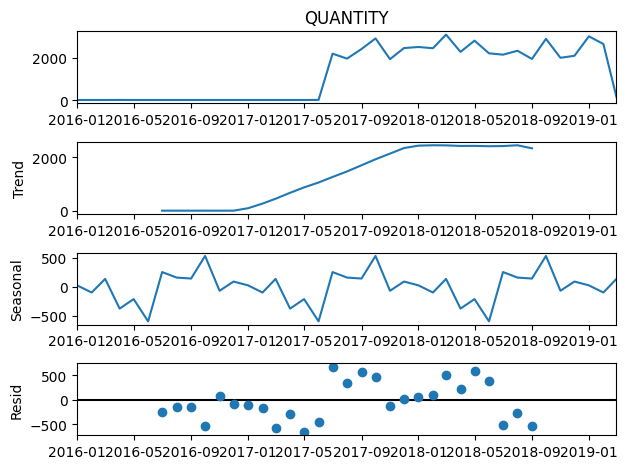

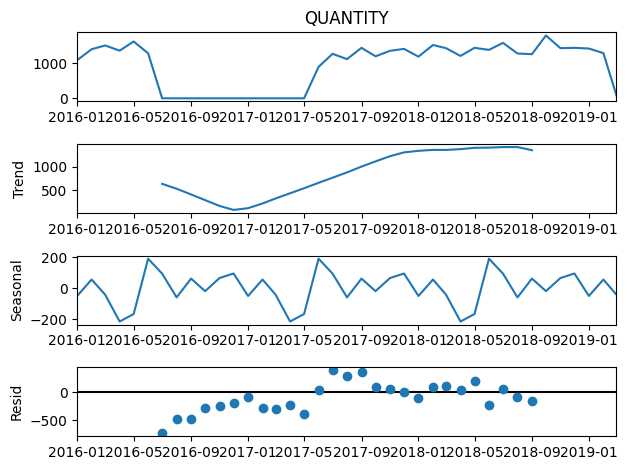

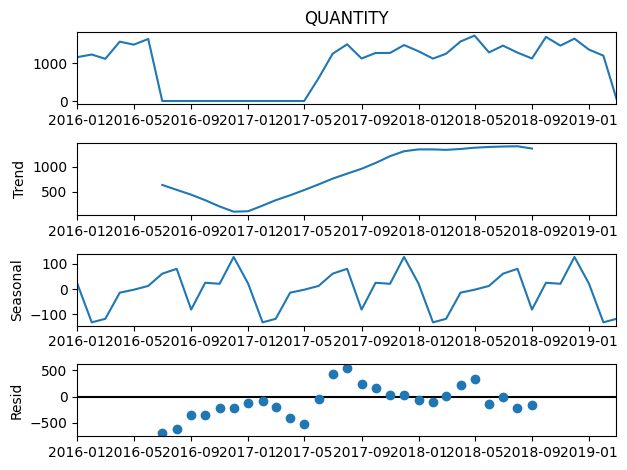

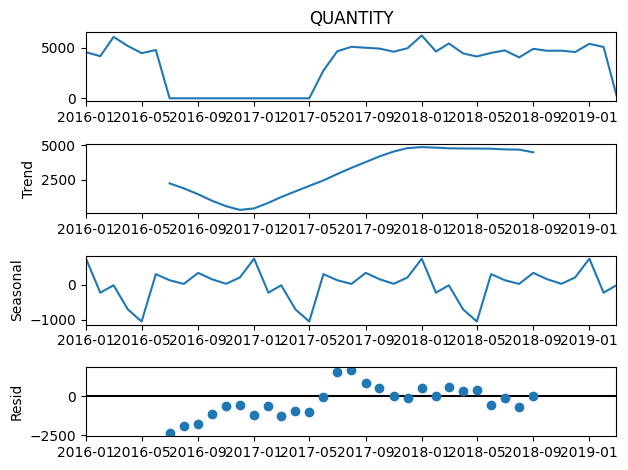

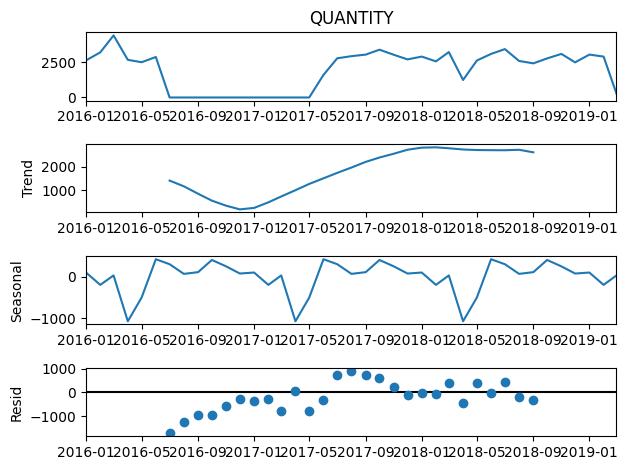

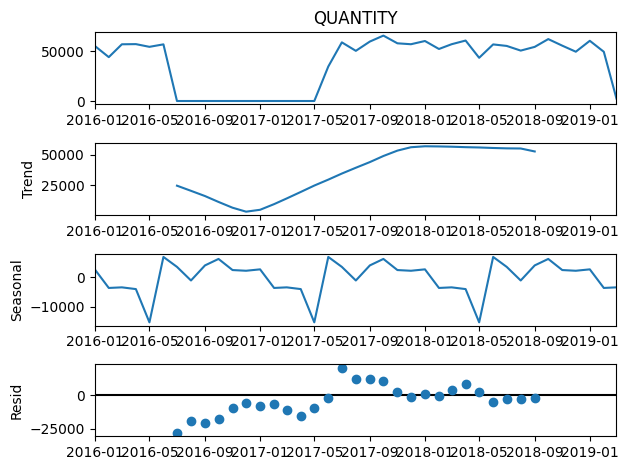

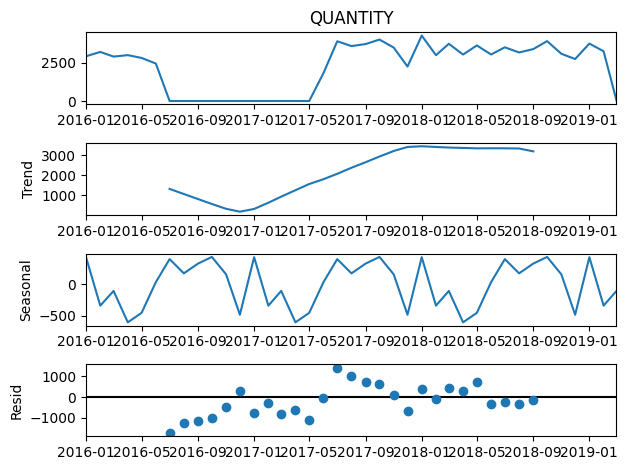

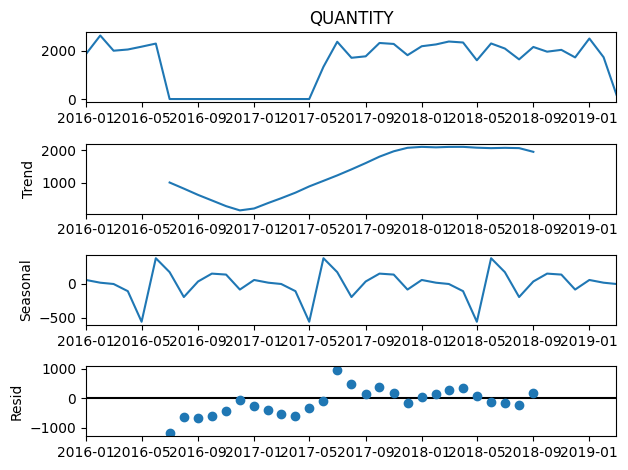

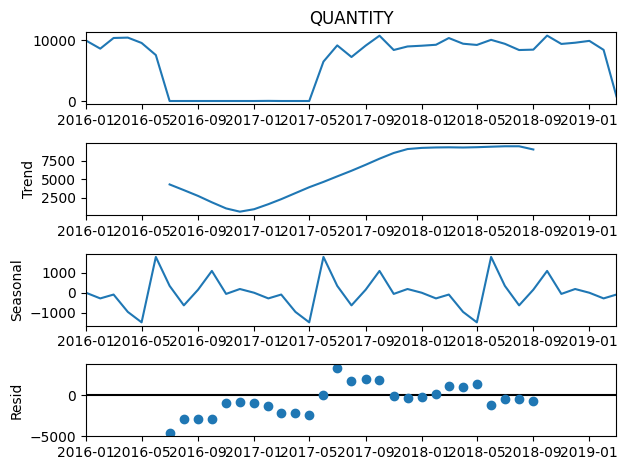

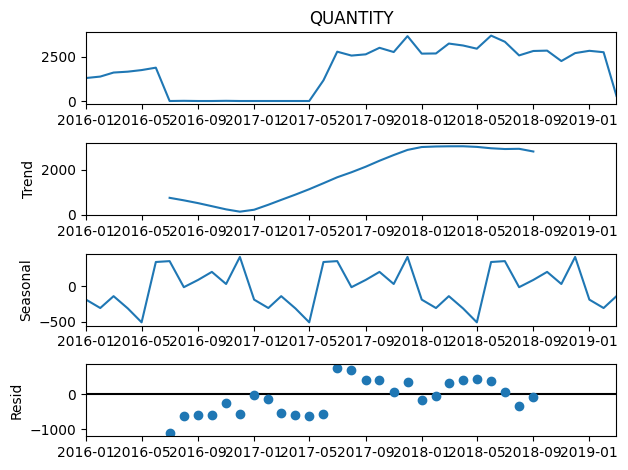

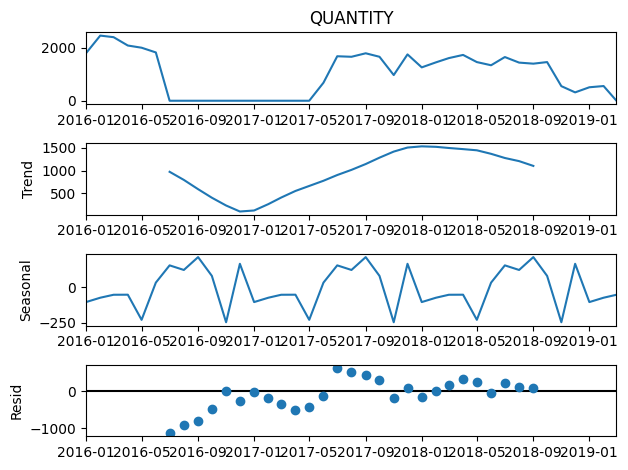

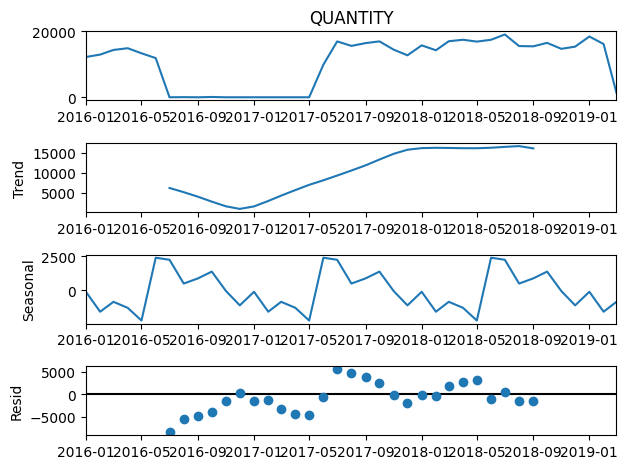

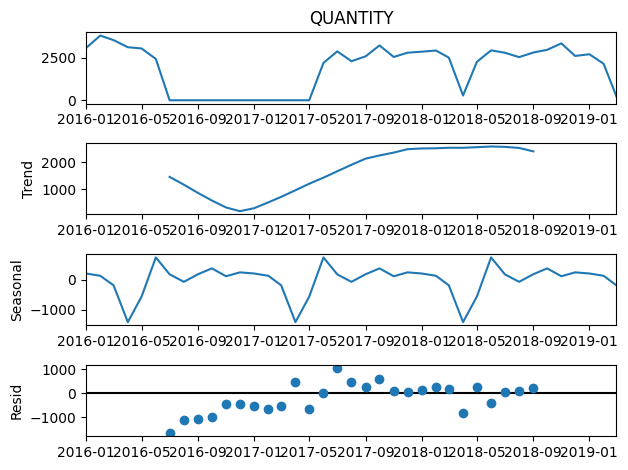

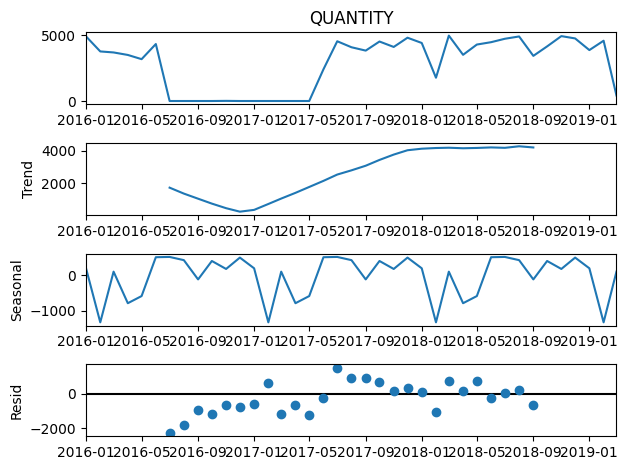

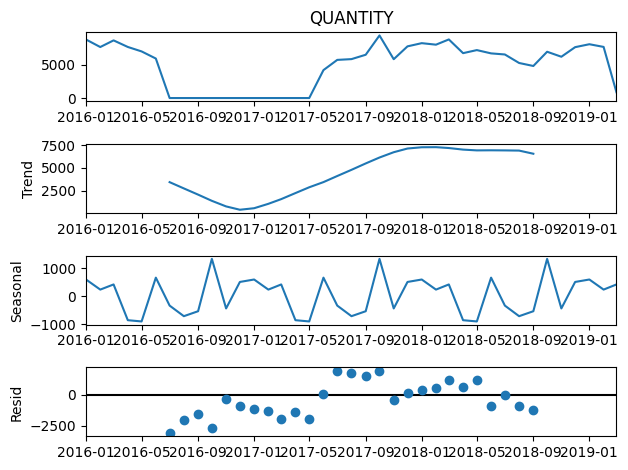

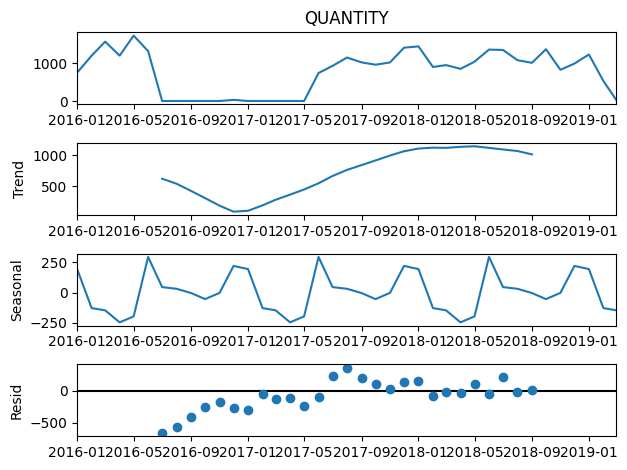

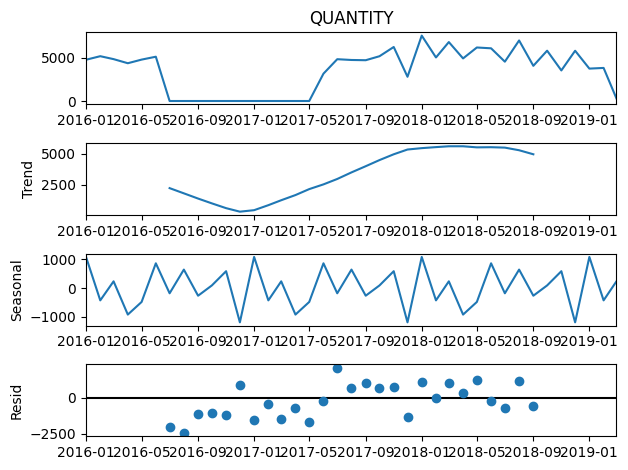

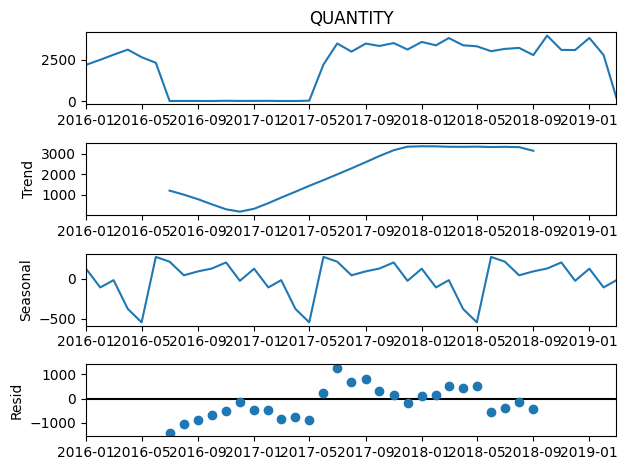

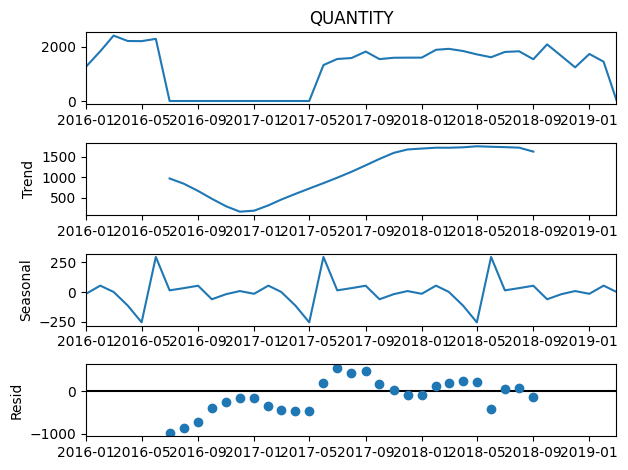

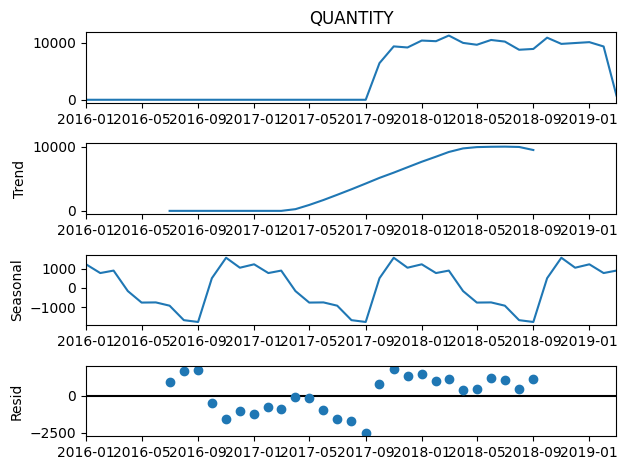

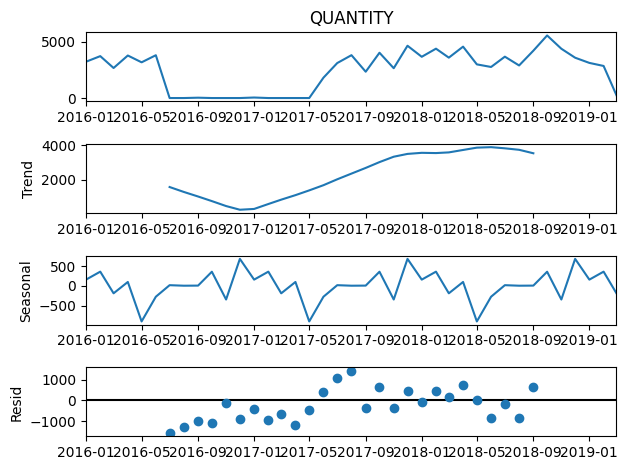

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Series

for medicine in medicines:
  series = df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == "HOSPI_1")]["QUANTITY"]
  series.index = pd.to_datetime(df[(df["HOSPI_CODE_UCD"] == medicines[0]) & (df["ID_SITE_RATTACHE"] == "HOSPI_1")]["DATE"])
  result = seasonal_decompose(series, model='additive')
  result.plot()
  plt.show()
  print()

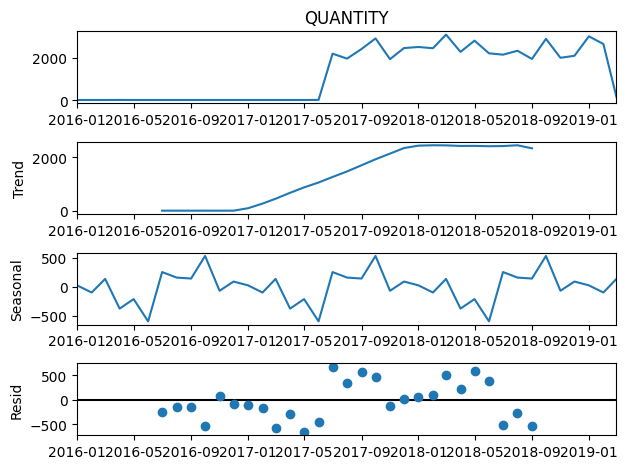

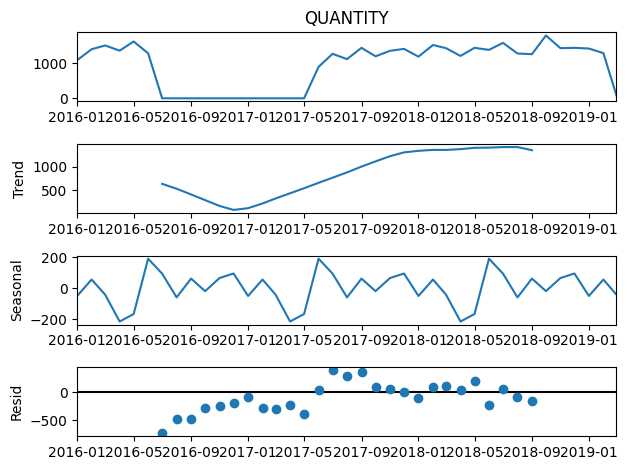

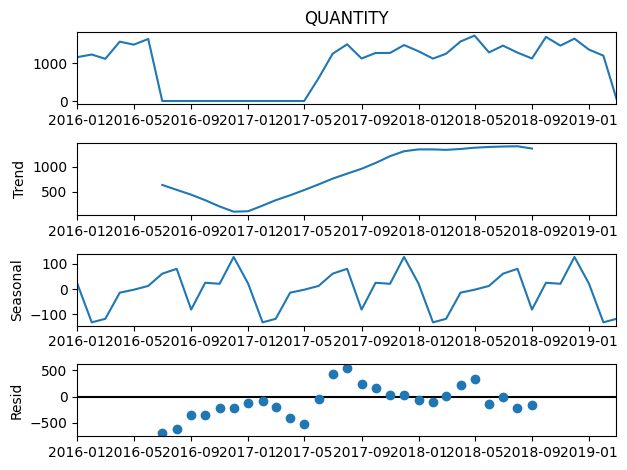

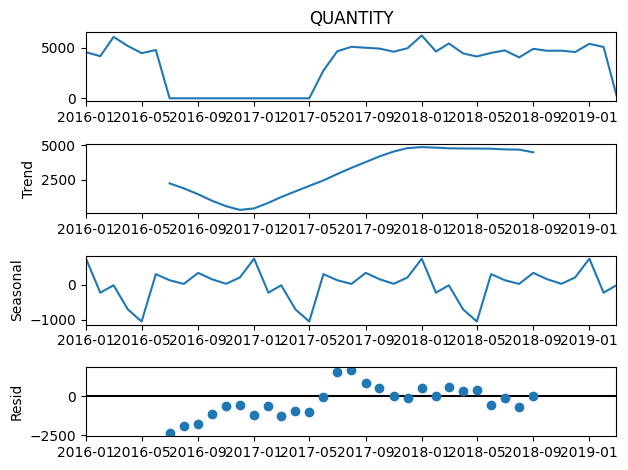

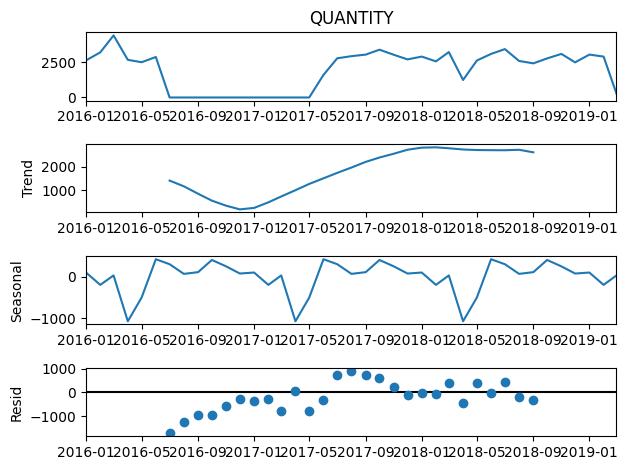

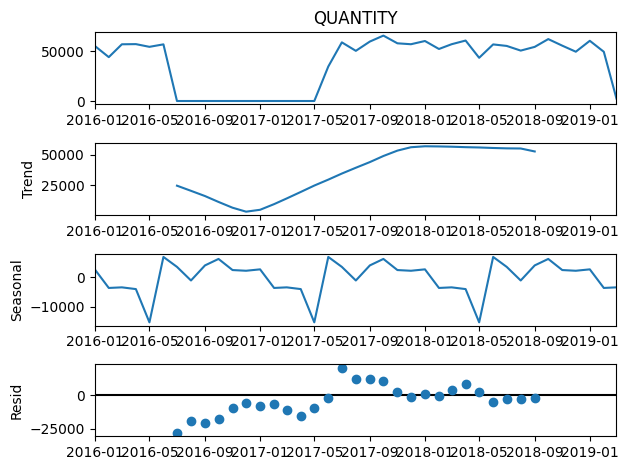

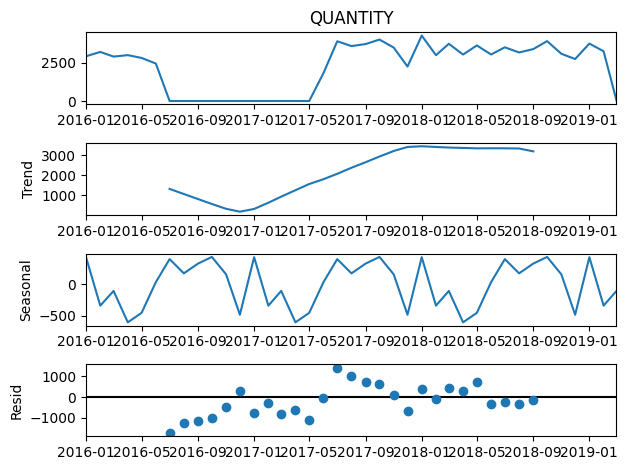

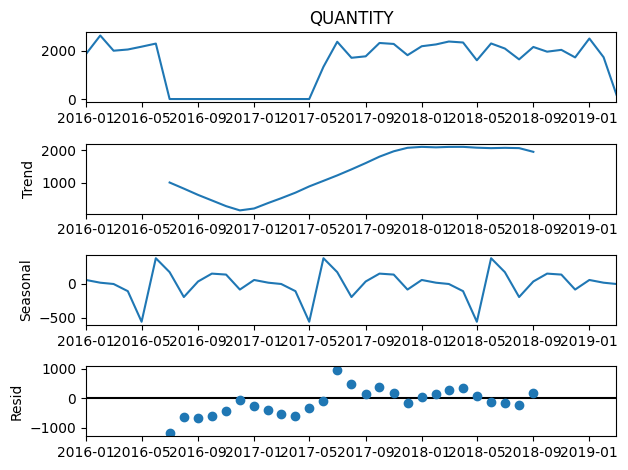

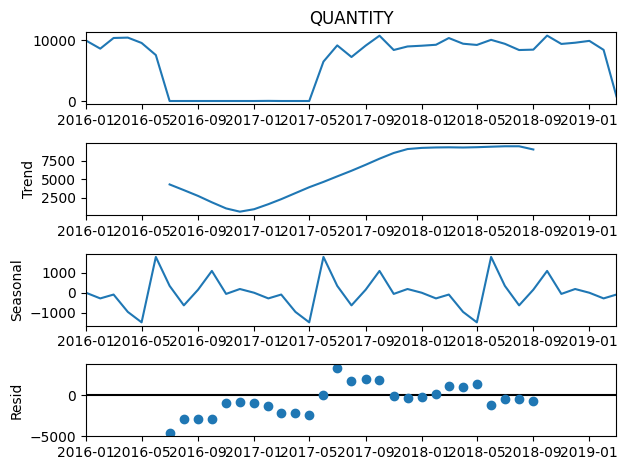

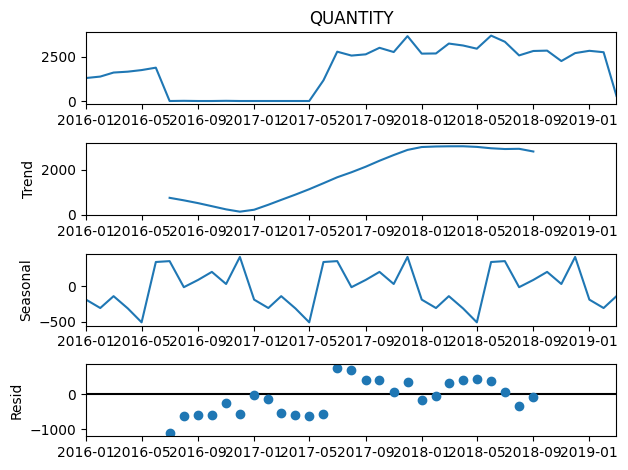

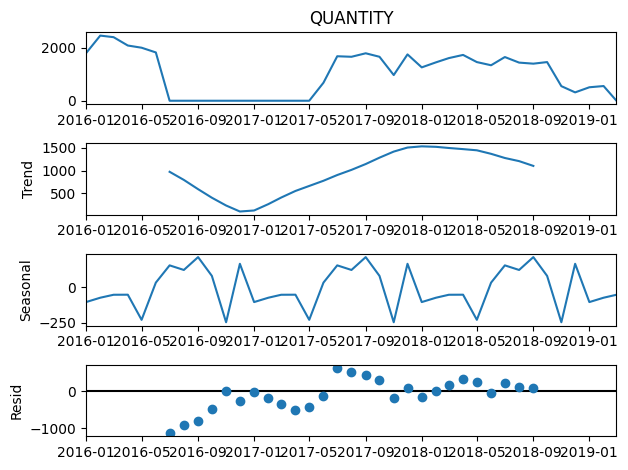

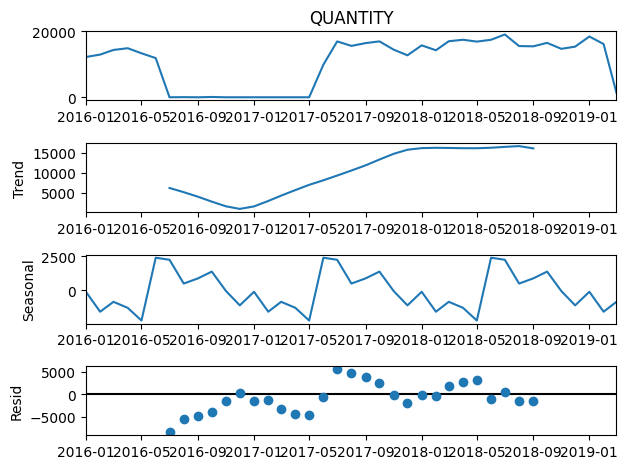

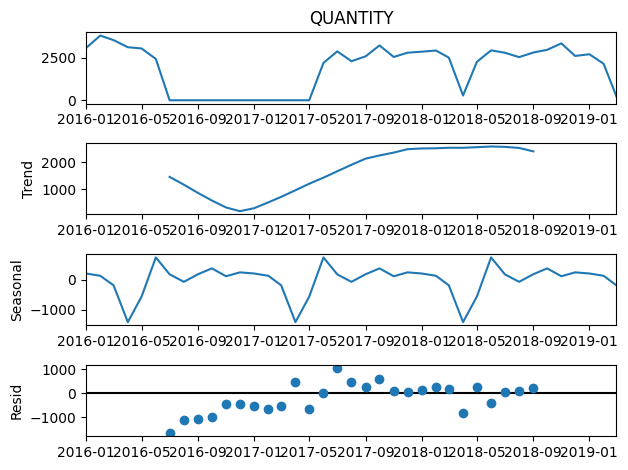

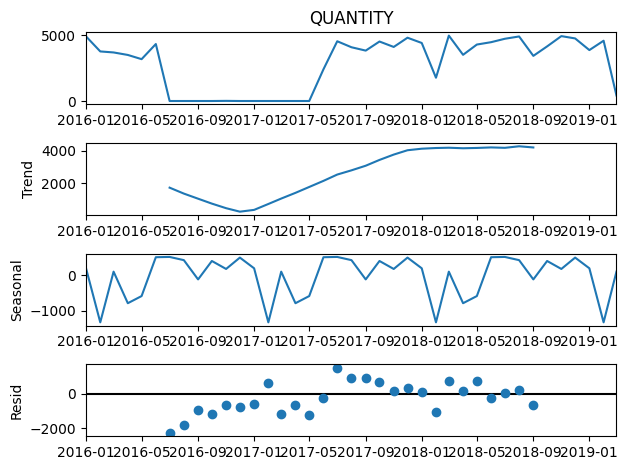

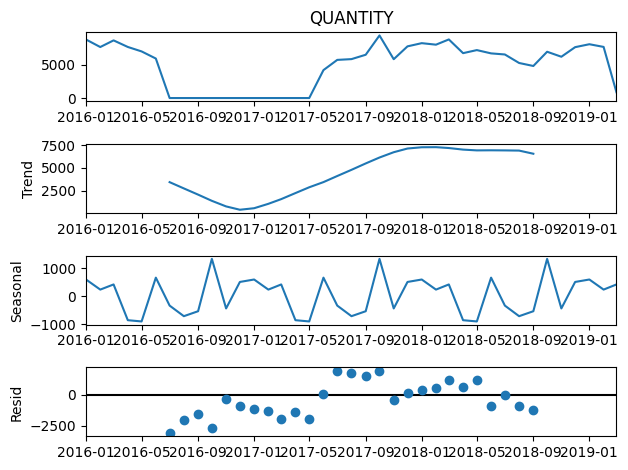

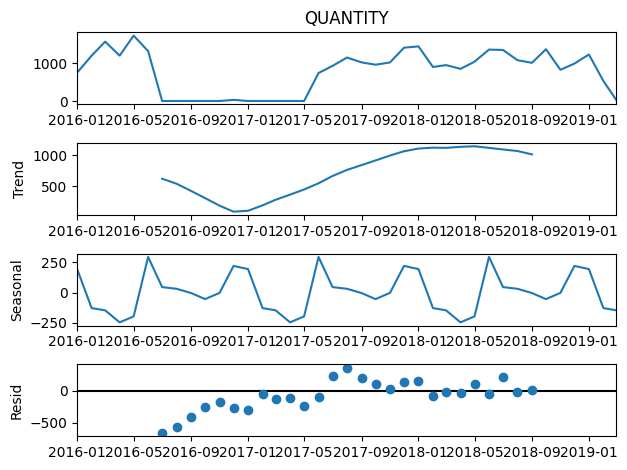

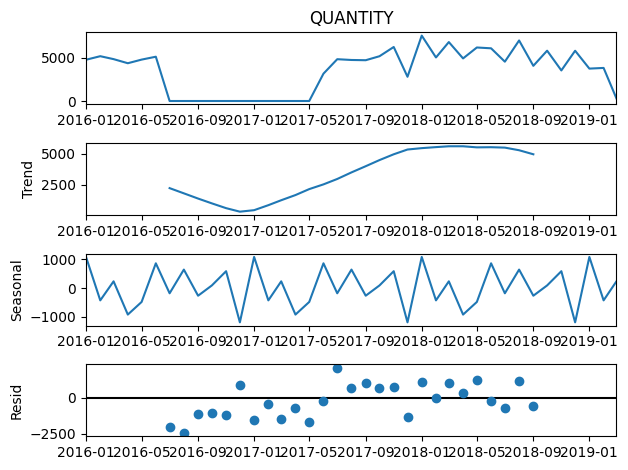

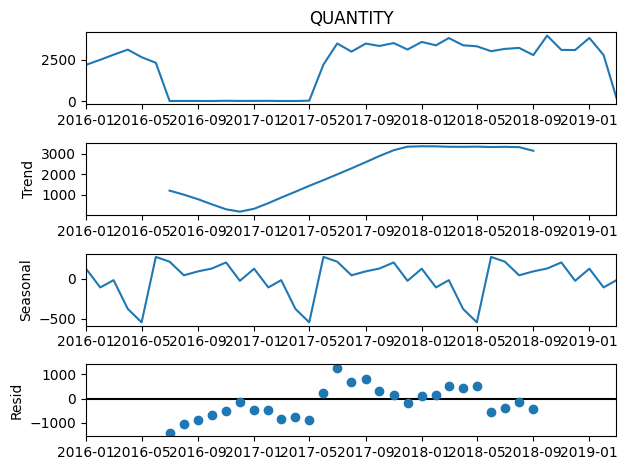

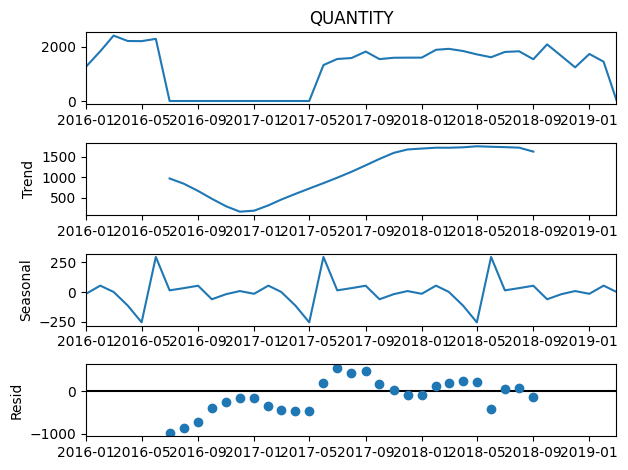

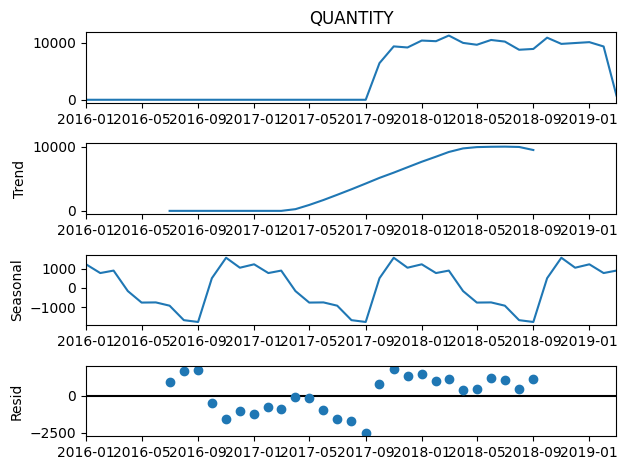

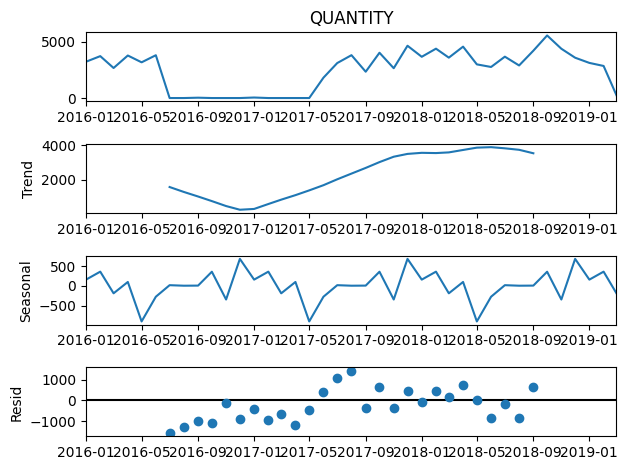

In [16]:
for medicine in medicines:
  series = df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == "HOSPI_1")]["QUANTITY"]
  series.index = pd.to_datetime(df[(df["HOSPI_CODE_UCD"] == medicines[0]) & (df["ID_SITE_RATTACHE"] == "HOSPI_2")]["DATE"])
  result = seasonal_decompose(series, model='additive')
  result.plot()
  plt.show()
  print()

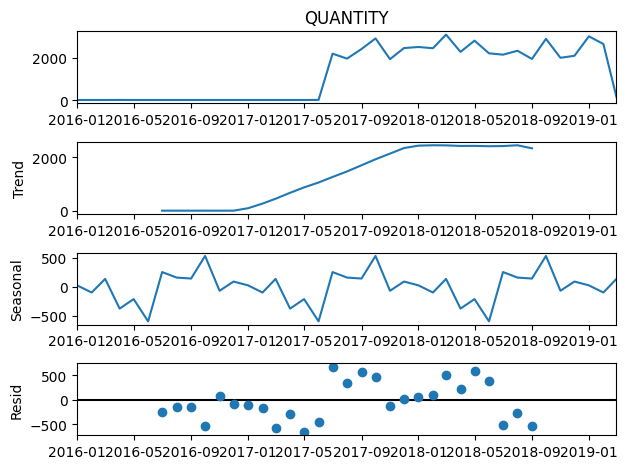

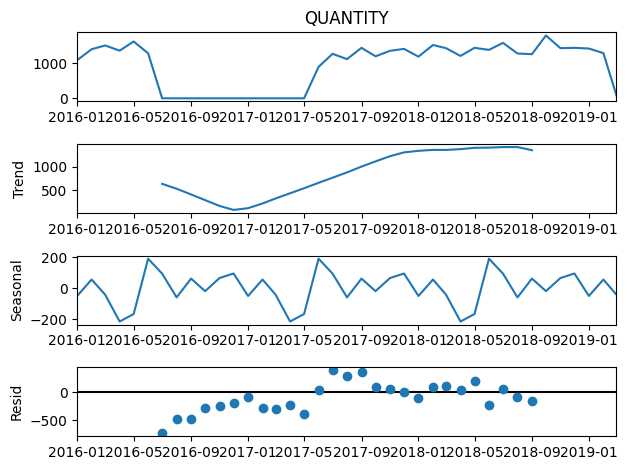

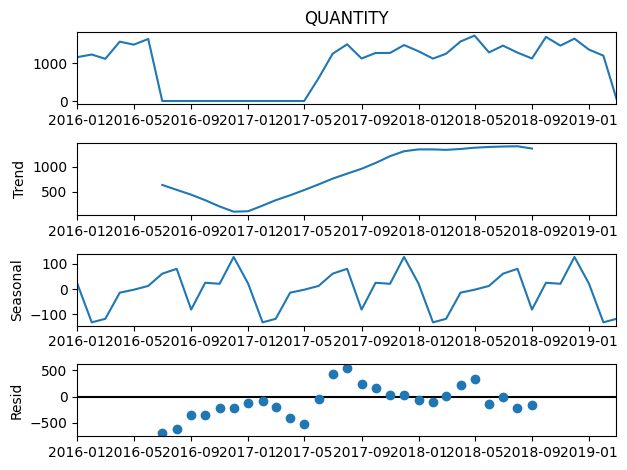

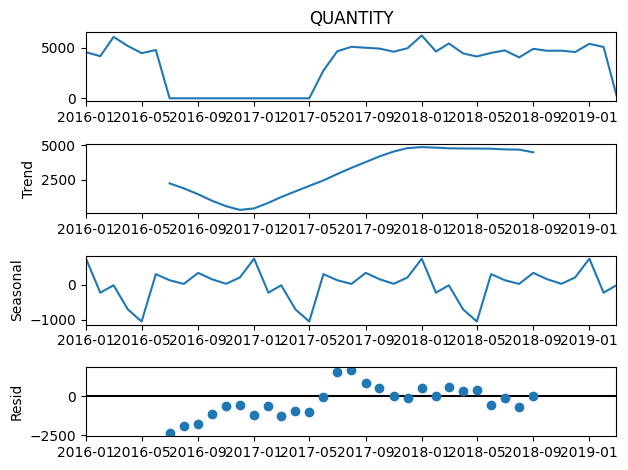

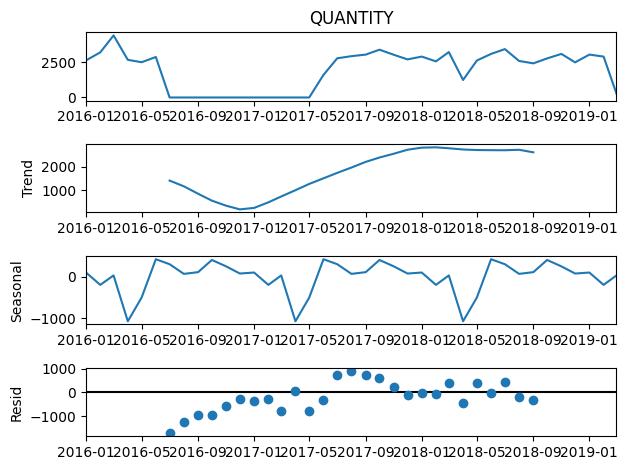

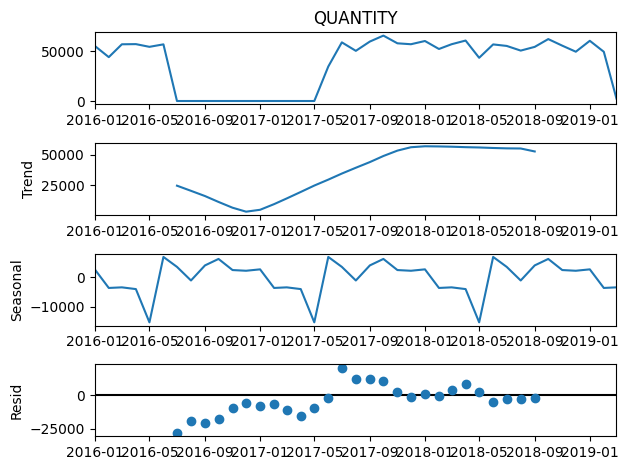

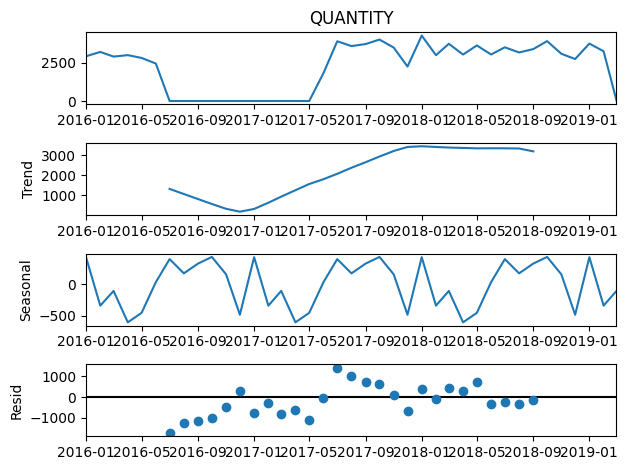

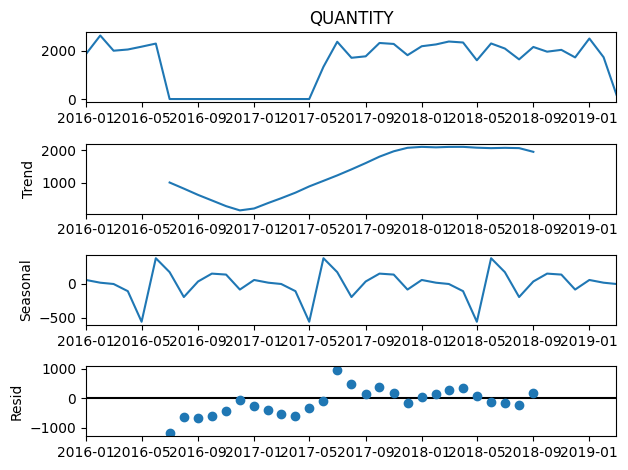

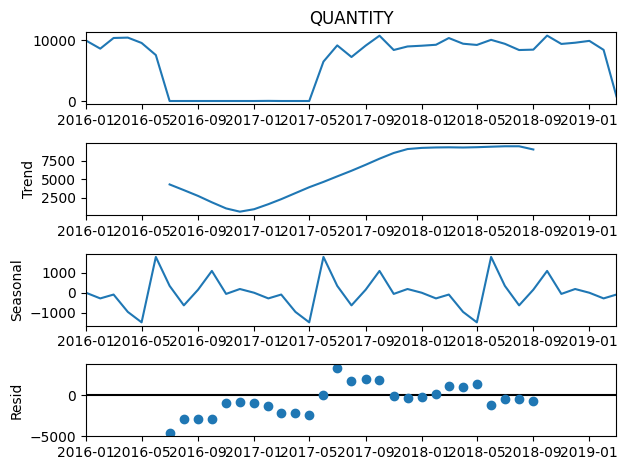

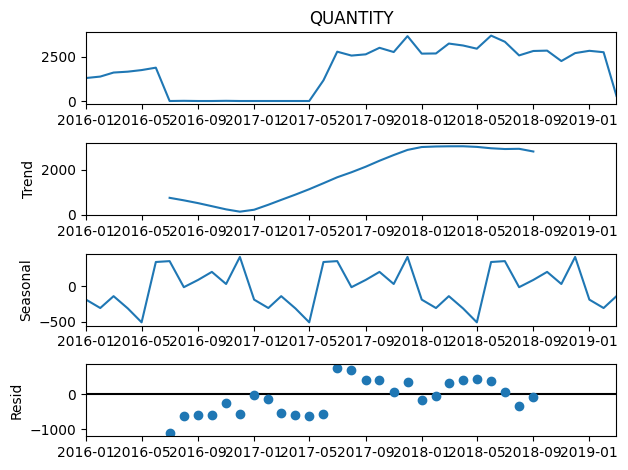

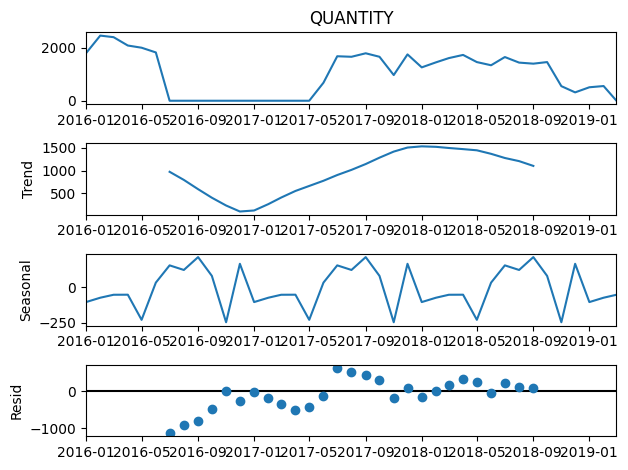

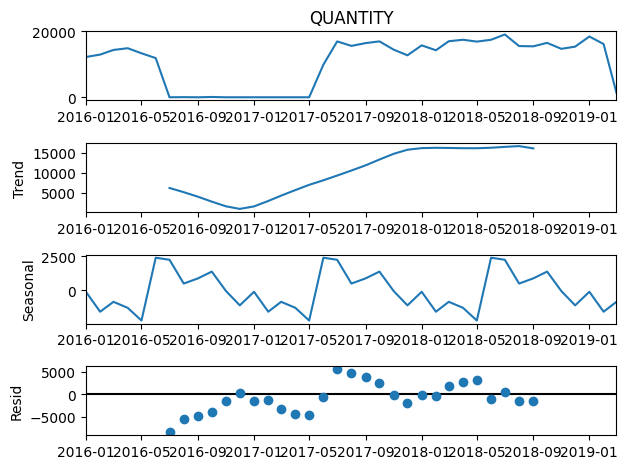

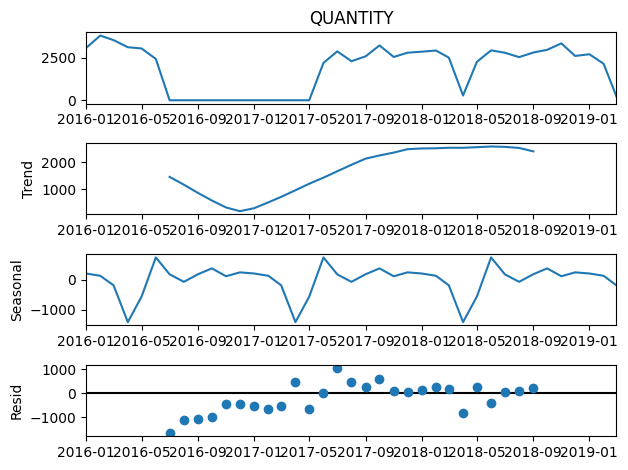

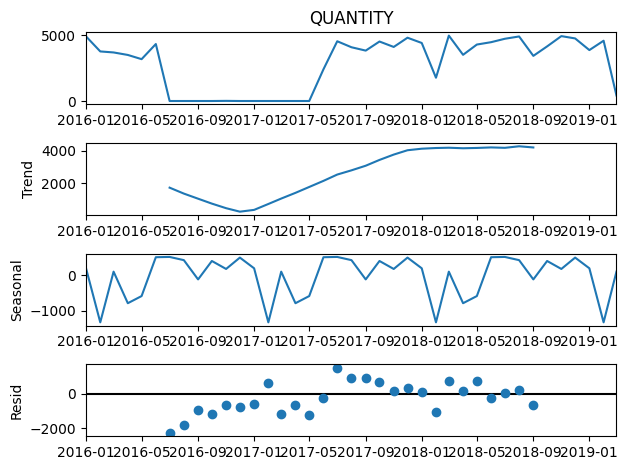

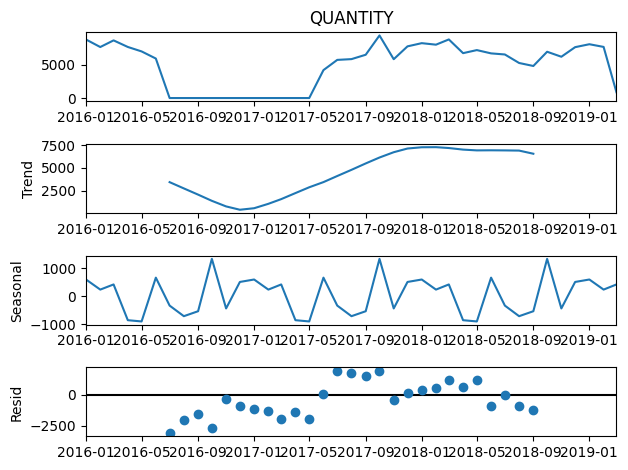

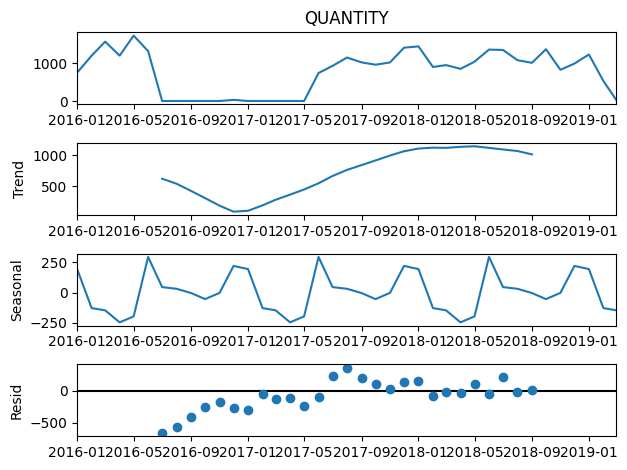

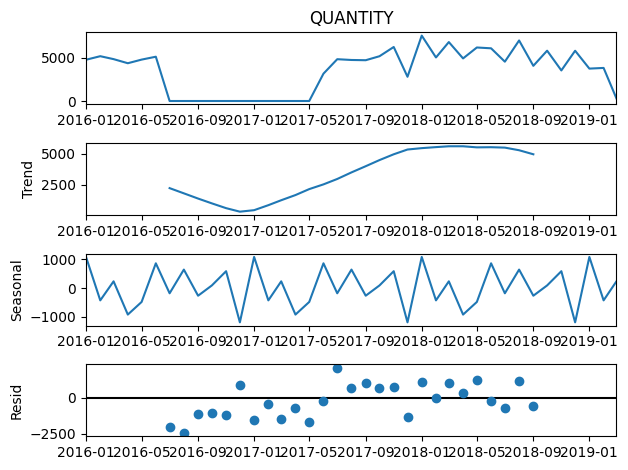

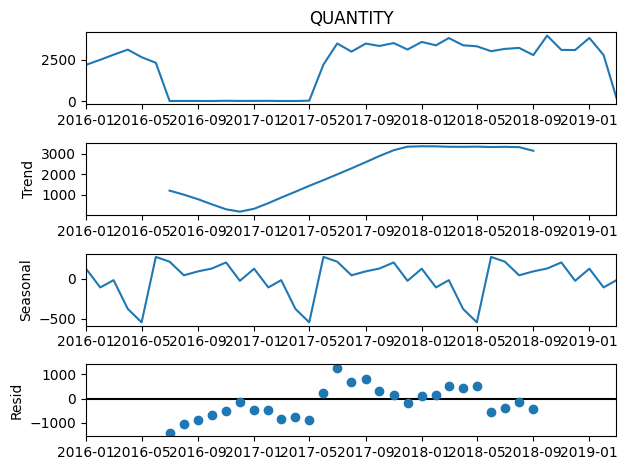

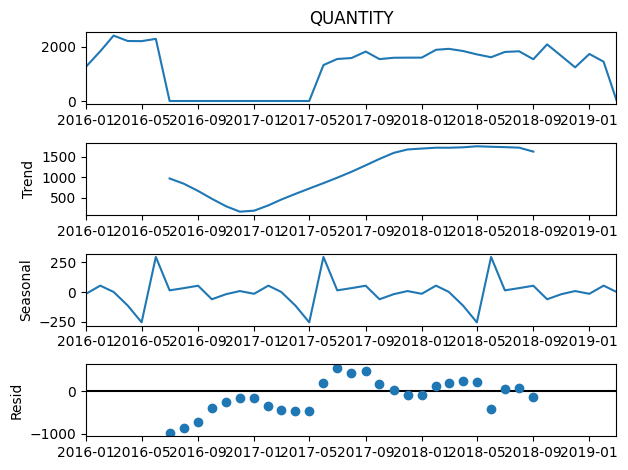

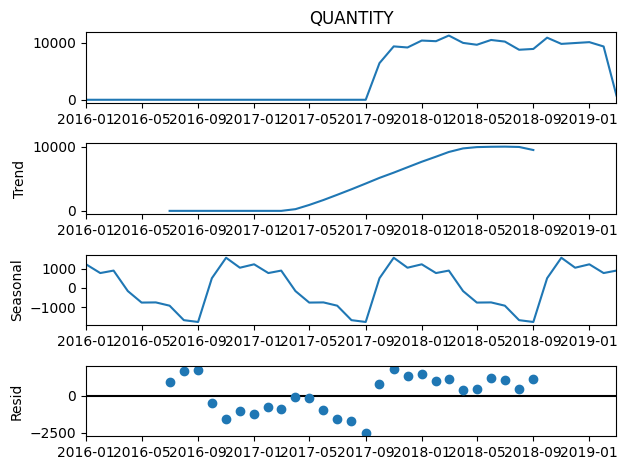

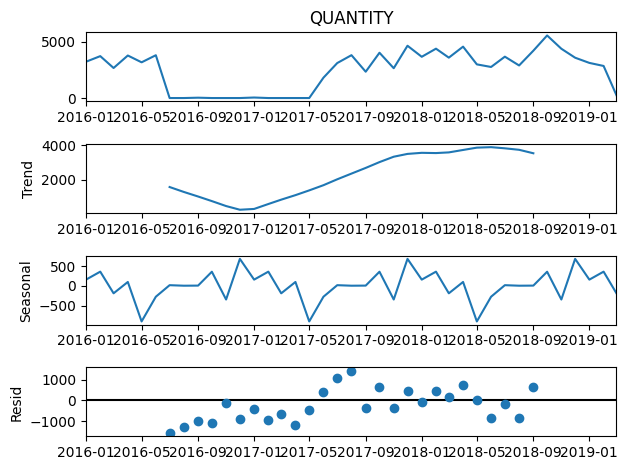

In [17]:
for medicine in medicines:
  series = df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == "HOSPI_1")]["QUANTITY"]
  series.index = pd.to_datetime(df[(df["HOSPI_CODE_UCD"] == medicines[0]) & (df["ID_SITE_RATTACHE"] == "HOSPI_3")]["DATE"])
  result = seasonal_decompose(series, model='additive')
  result.plot()
  plt.show()
  print()

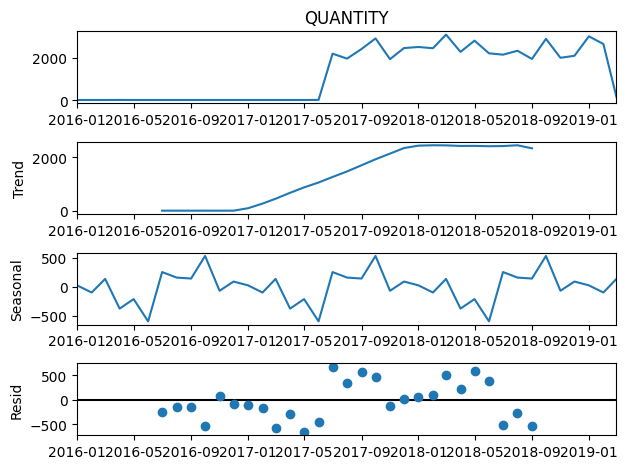

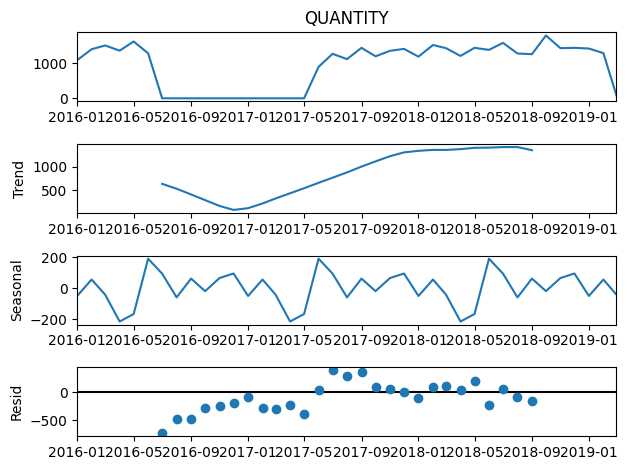

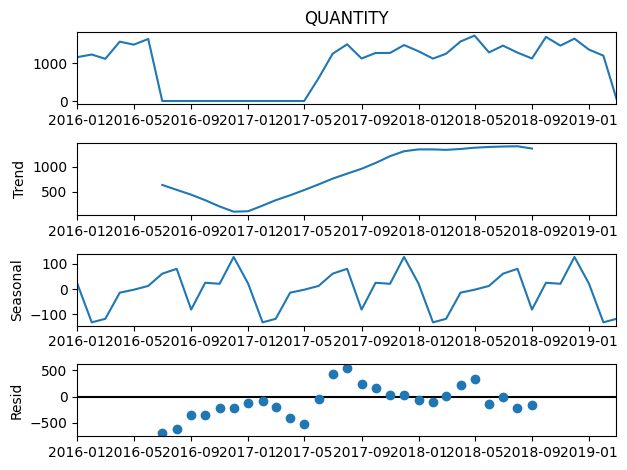

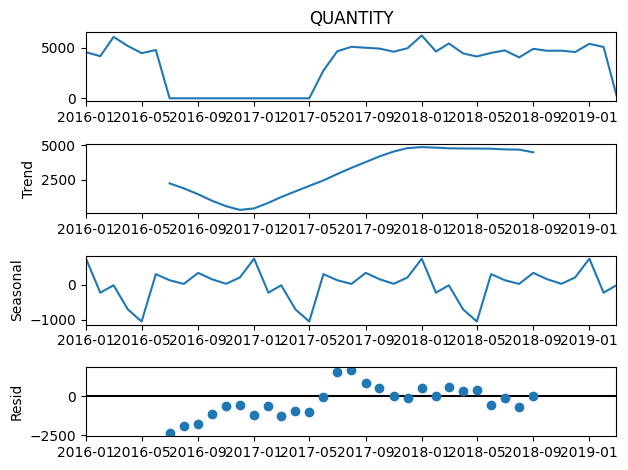

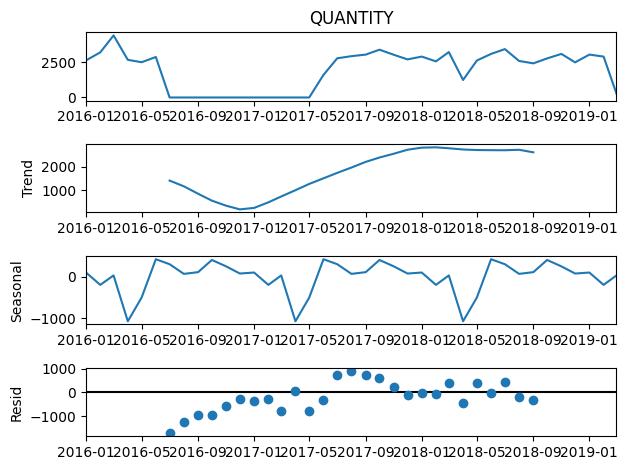

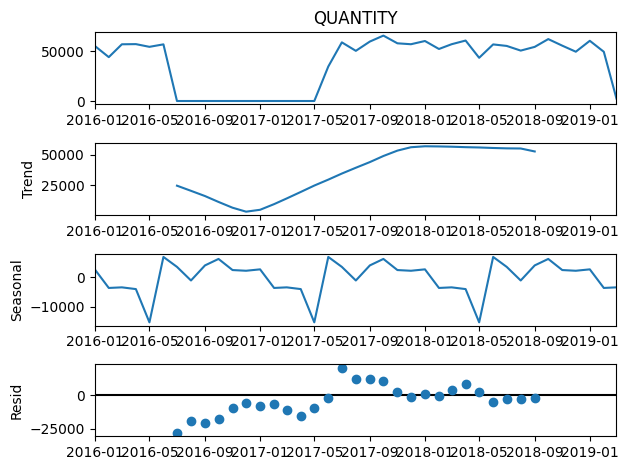

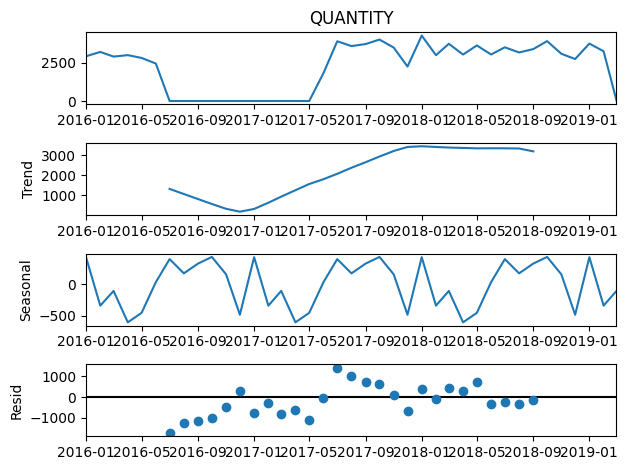

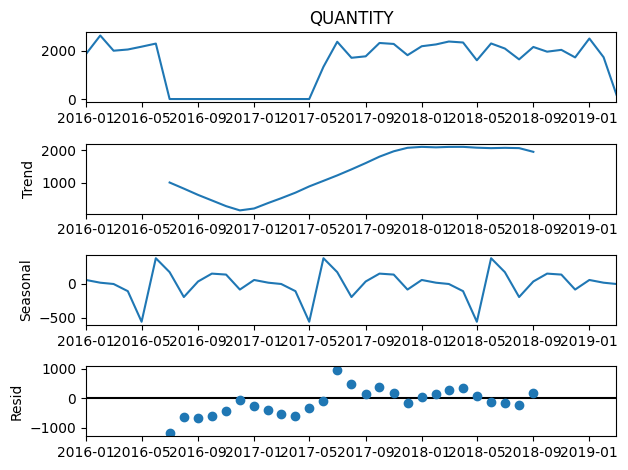

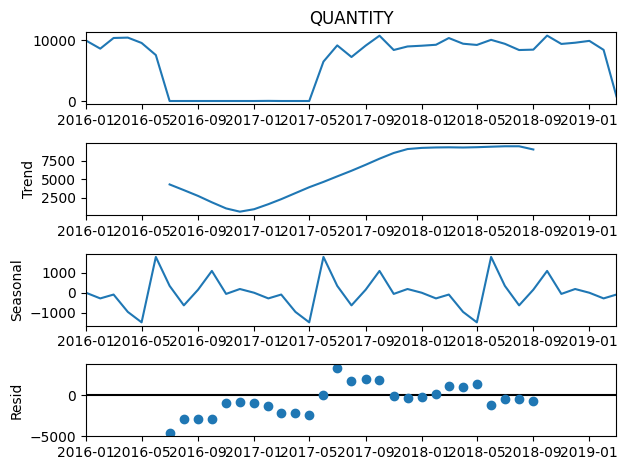

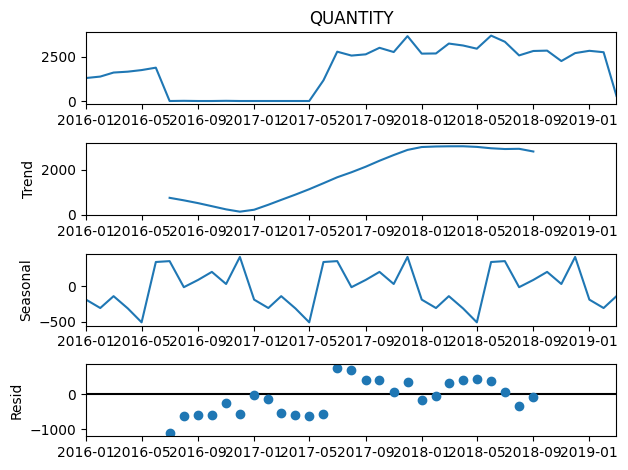

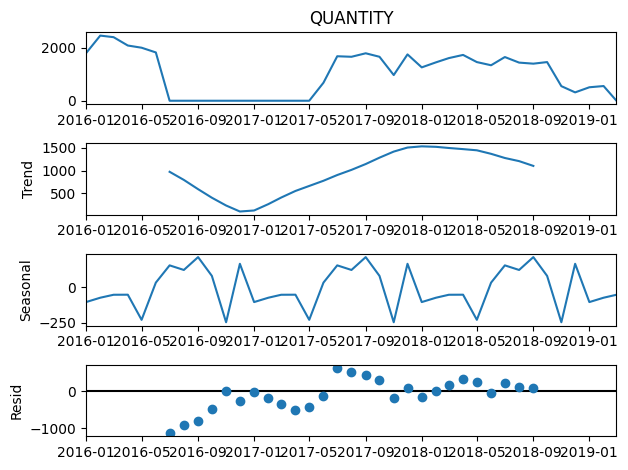

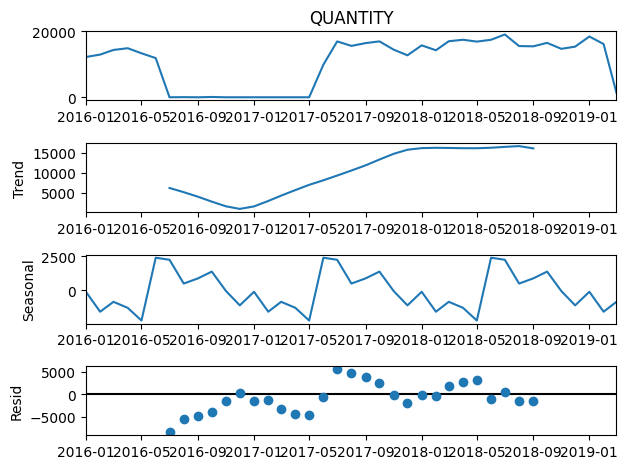

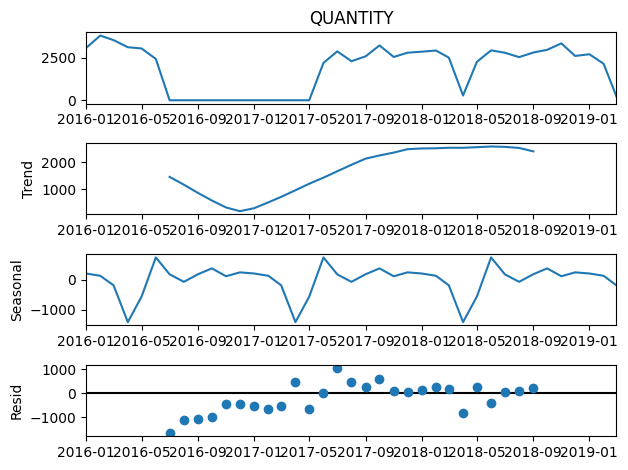

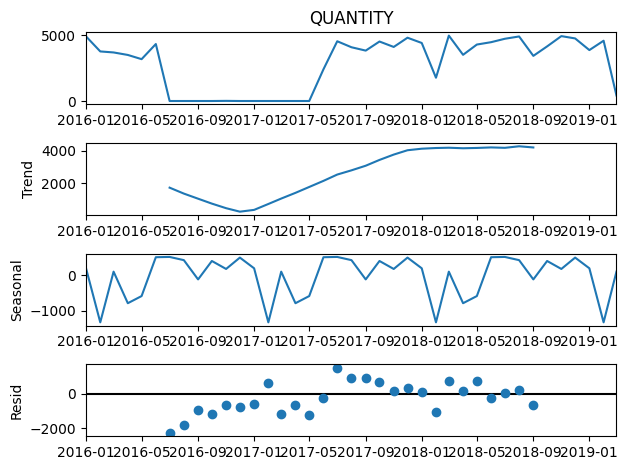

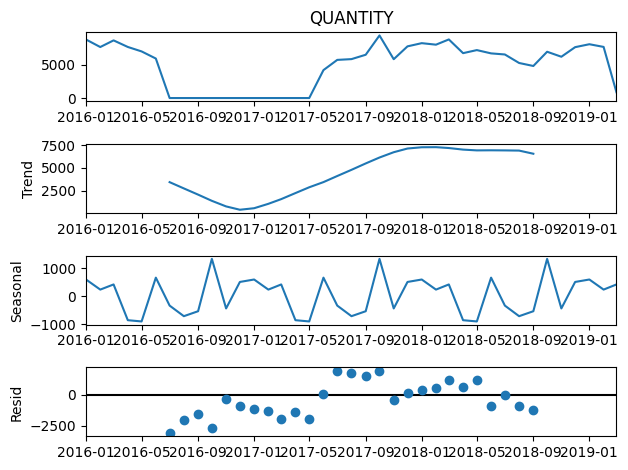

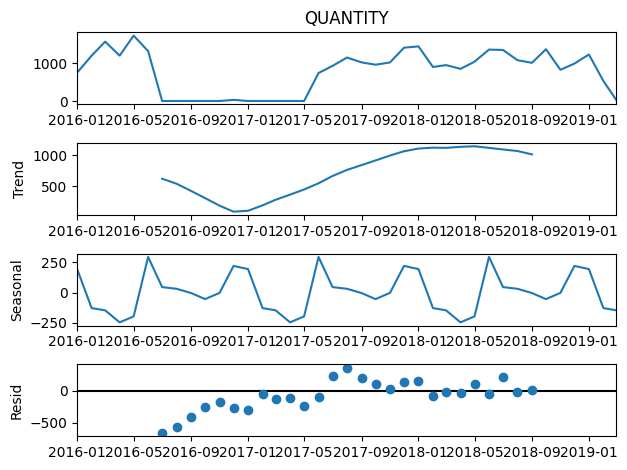

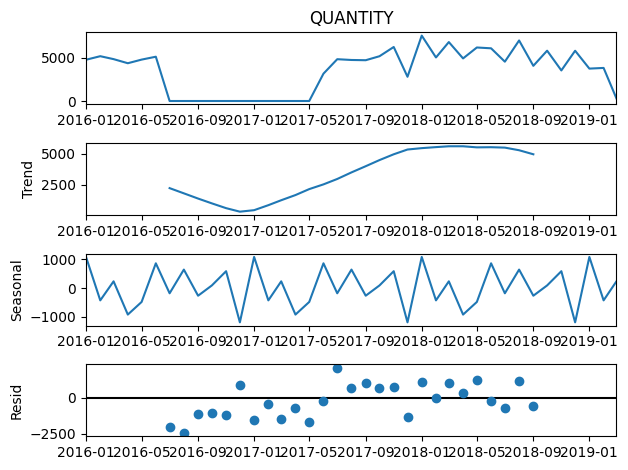

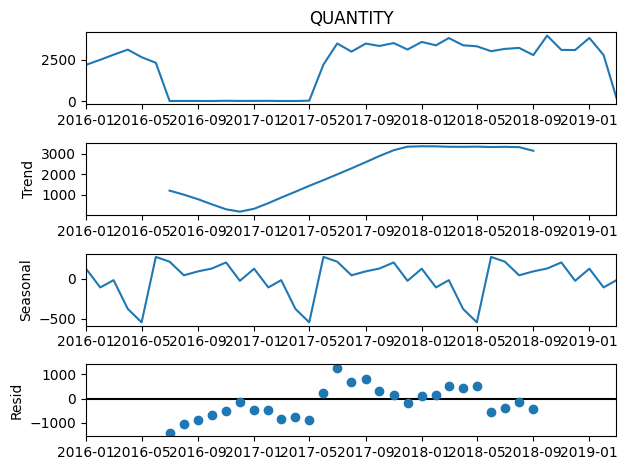

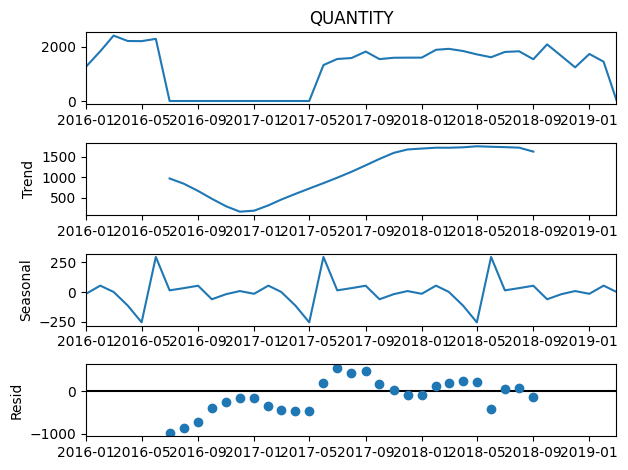

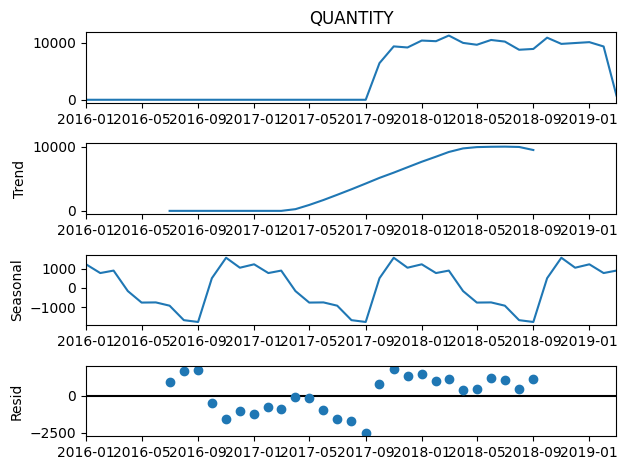

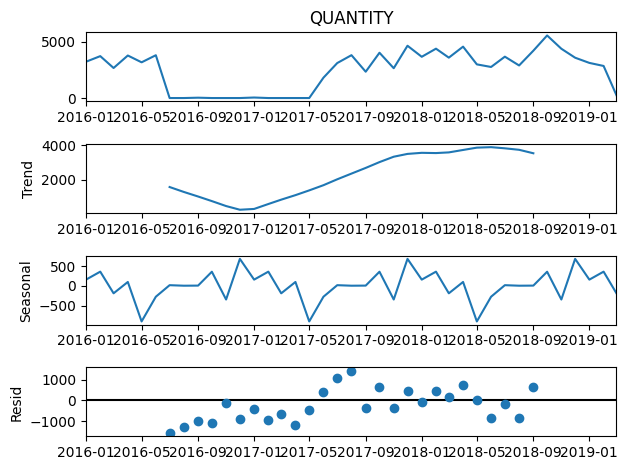

In [18]:
for medicine in medicines:
  series = df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == "HOSPI_1")]["QUANTITY"]
  series.index = pd.to_datetime(df[(df["HOSPI_CODE_UCD"] == medicines[0]) & (df["ID_SITE_RATTACHE"] == "HOSPI_4")]["DATE"])
  result = seasonal_decompose(series, model='additive')
  result.plot()
  plt.show()
  print()

In [29]:
def ts_features(df):
    for hospital in df.ID_SITE_RATTACHE.unique():
        for medicine in medicines:
            series = df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital)]["QUANTITY"]
            series.index = pd.to_datetime(df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital)]["DATE"])
            result = seasonal_decompose(series, model='additive')
            df.loc[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital), "TREND"] = result.trend.values
            df.loc[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital), "SEASONAL"] = result.seasonal.values
            df.loc[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital), "RESID"] = result.resid.values
    df.fillna(0, inplace=True)  # Replace NaN values with zero

In [30]:
ts_features(df)

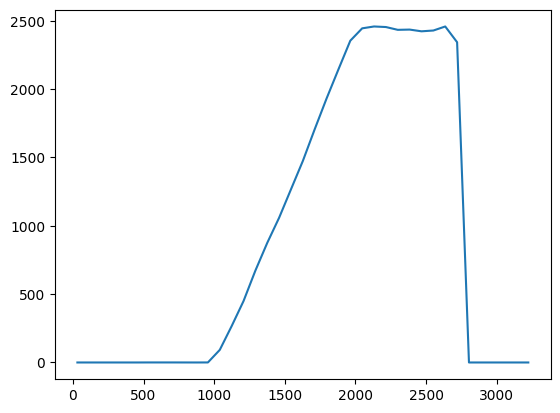

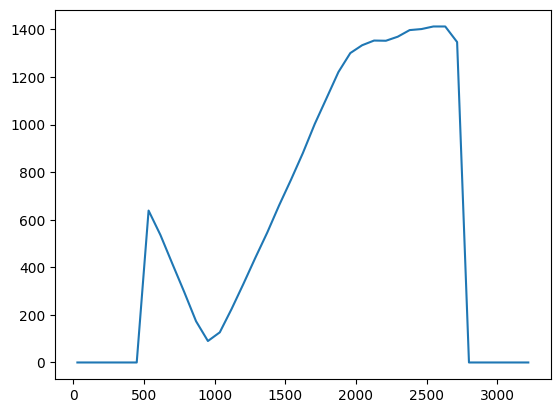

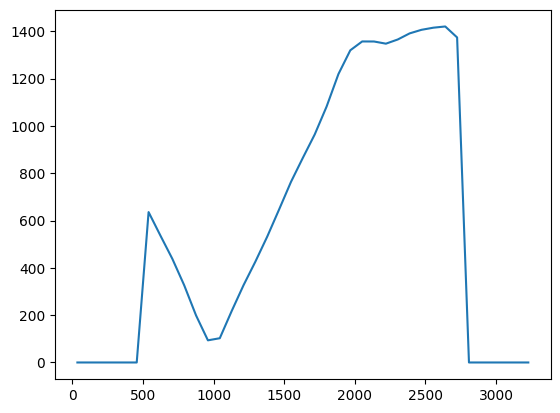

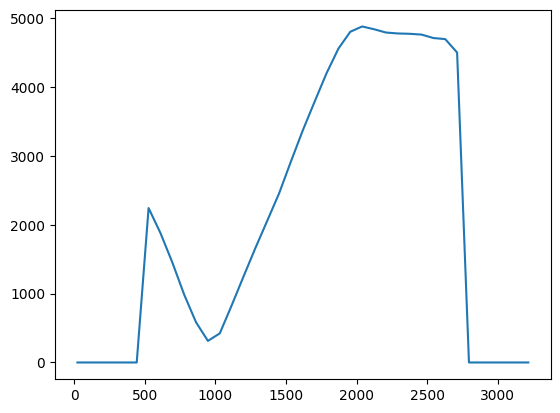

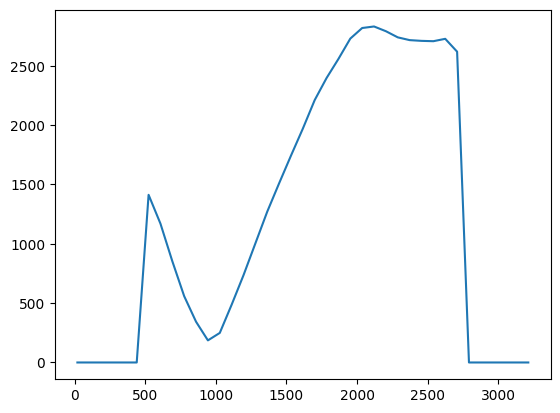

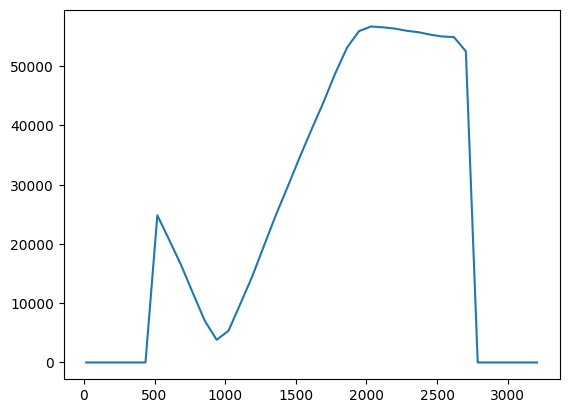

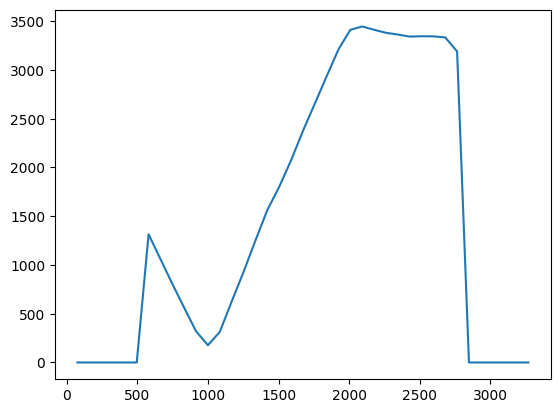

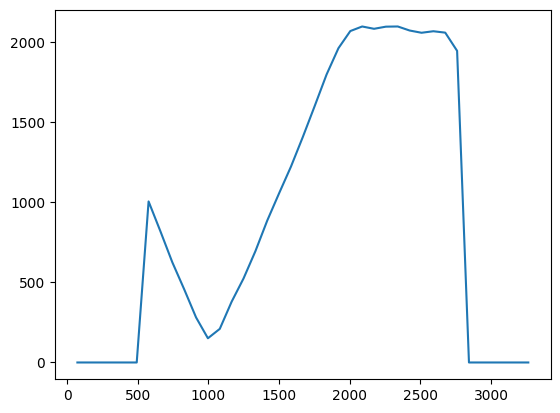

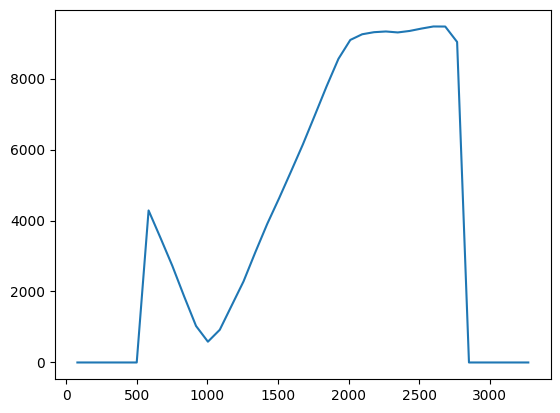

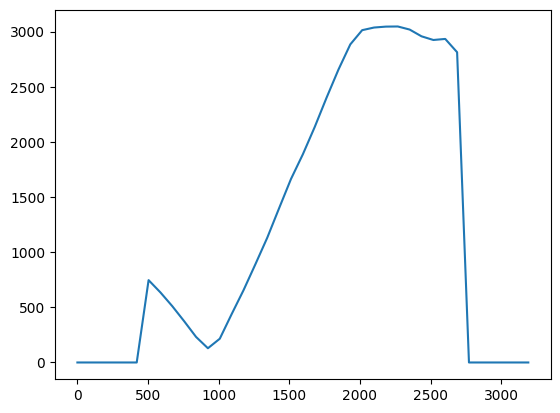

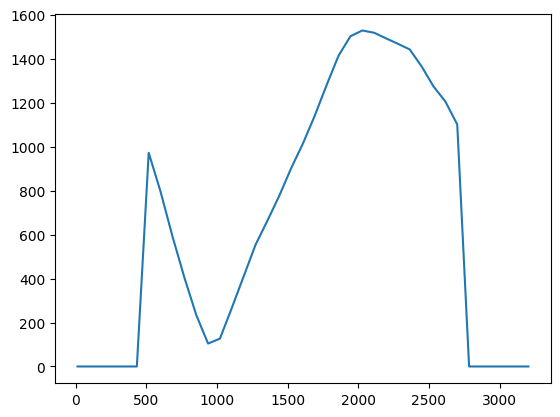

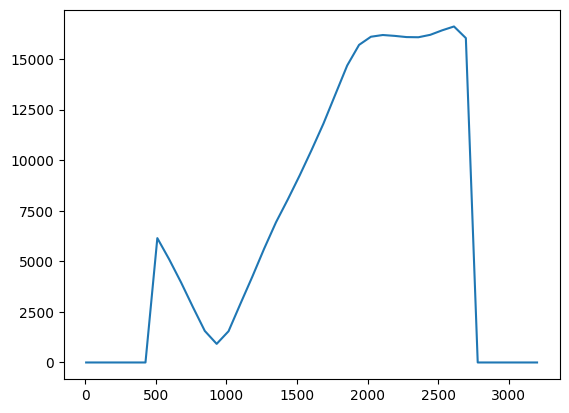

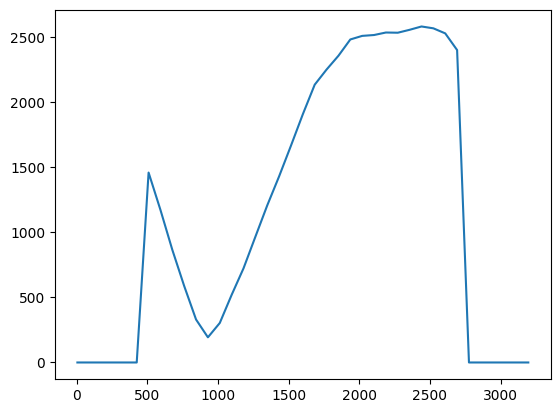

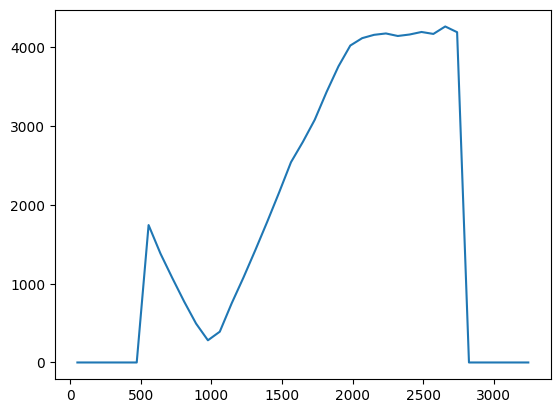

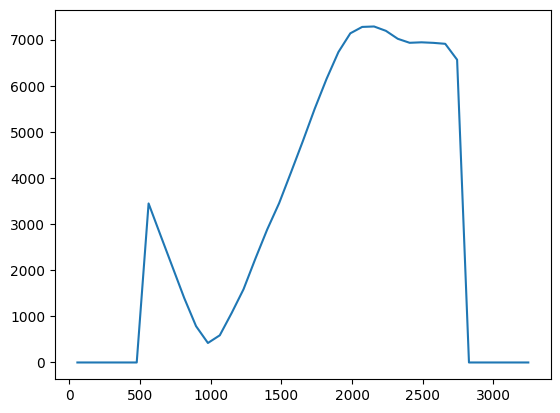

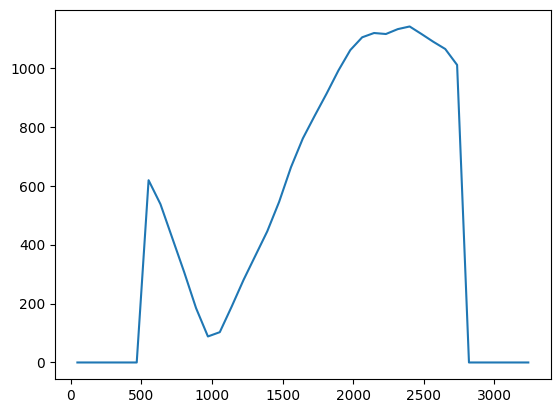

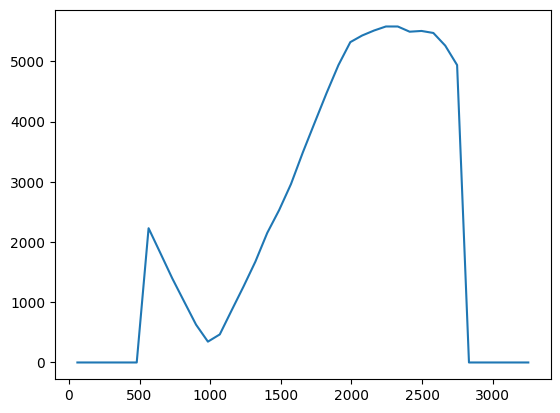

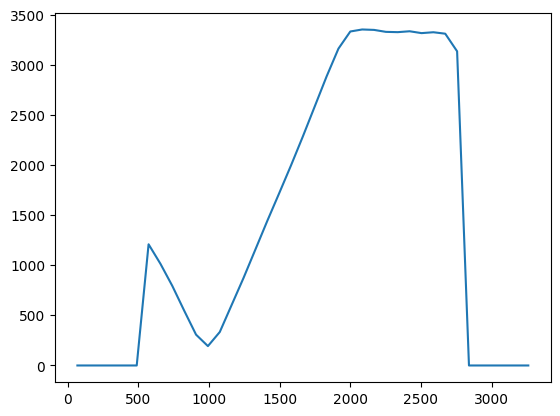

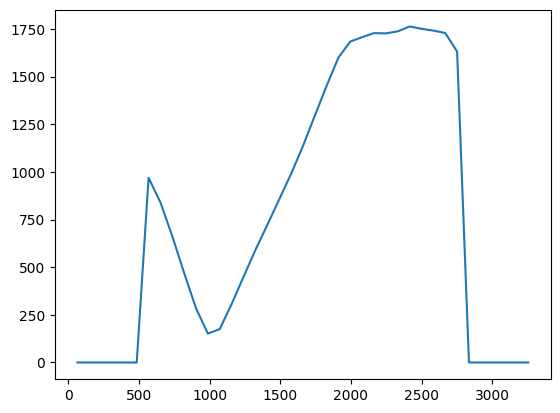

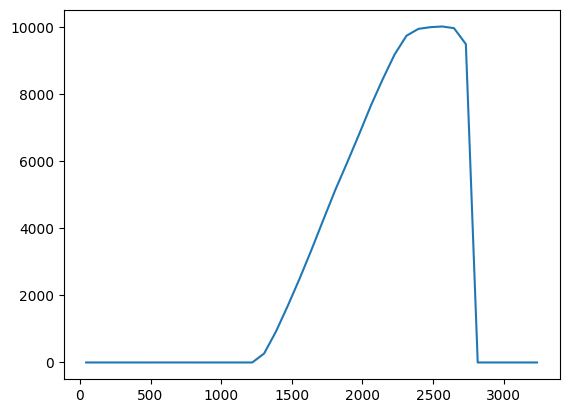

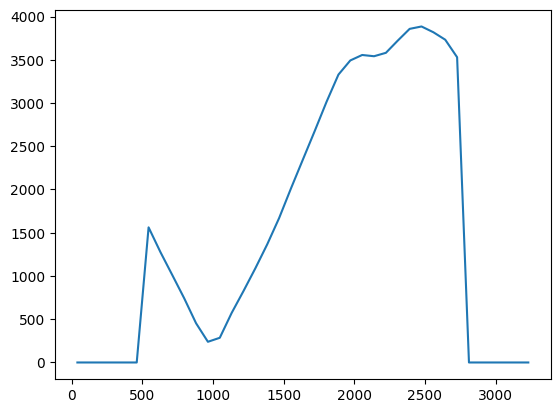

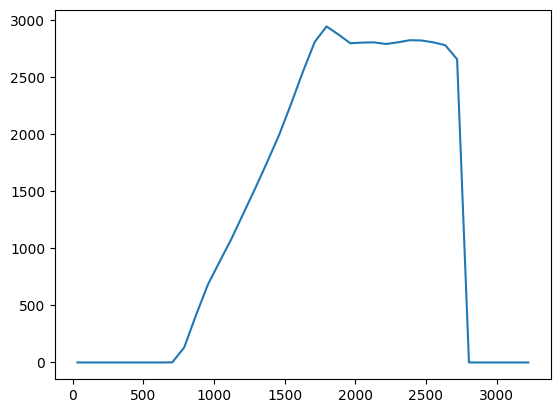

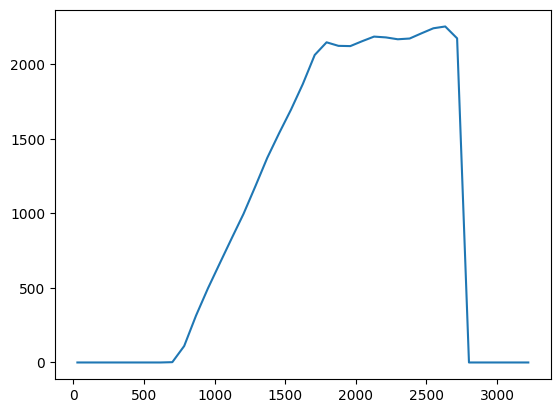

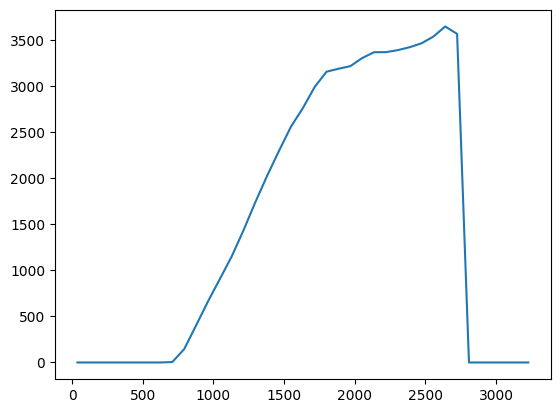

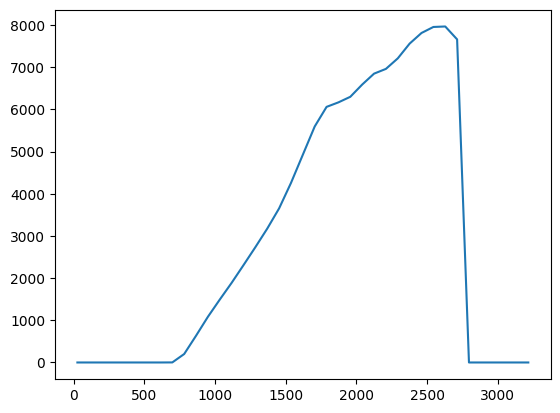

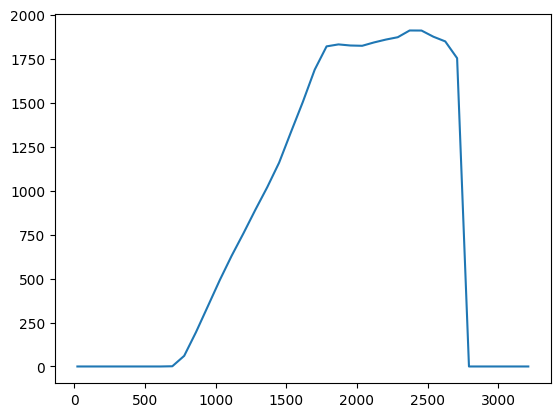

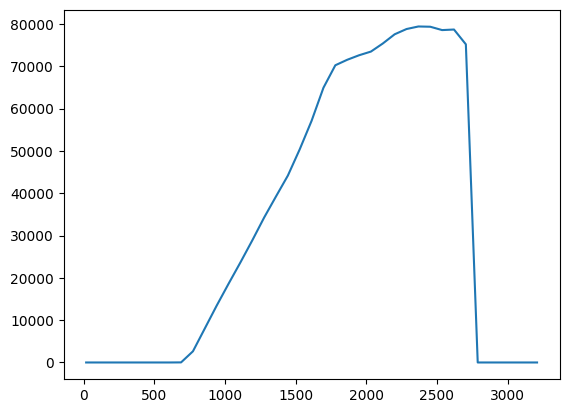

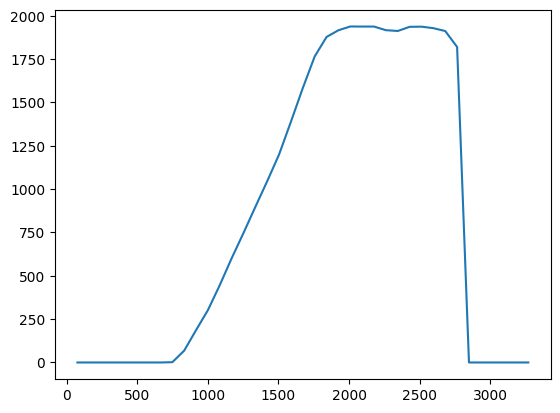

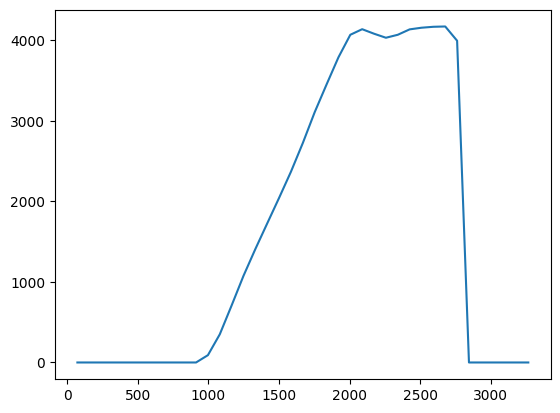

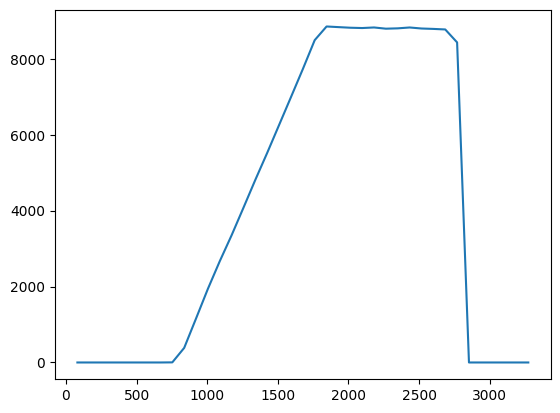

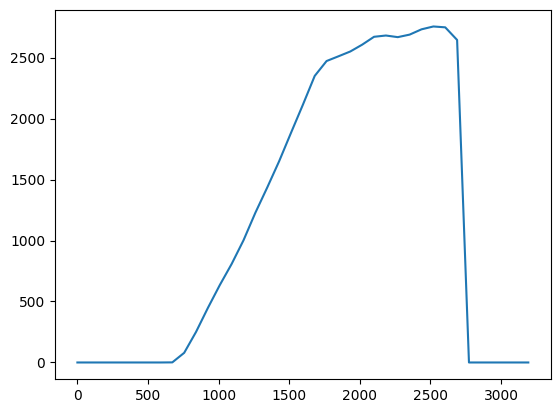

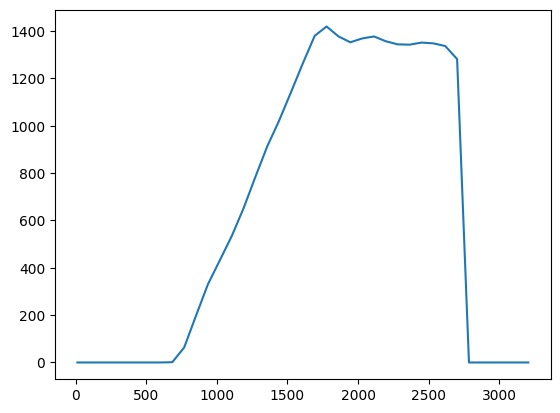

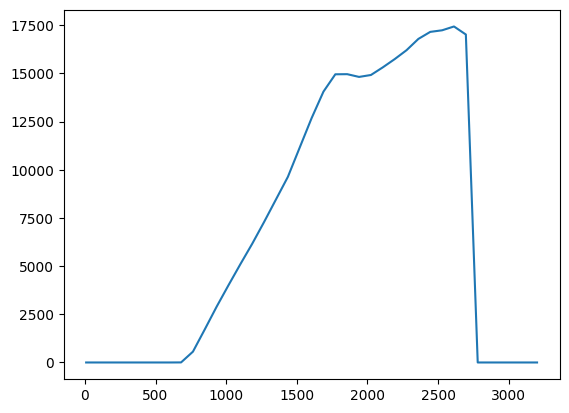

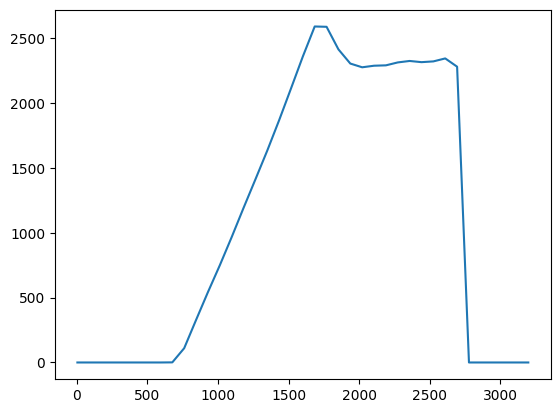

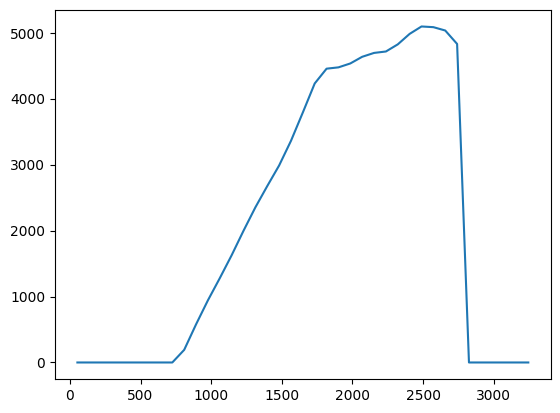

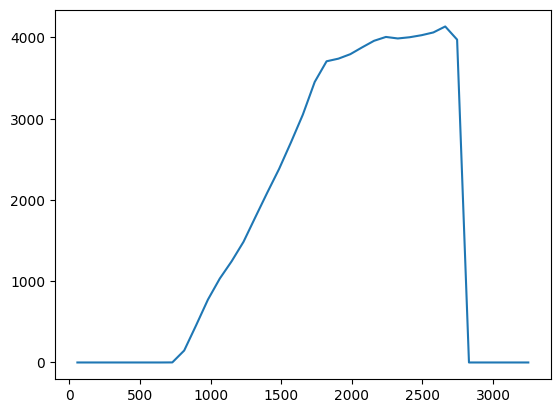

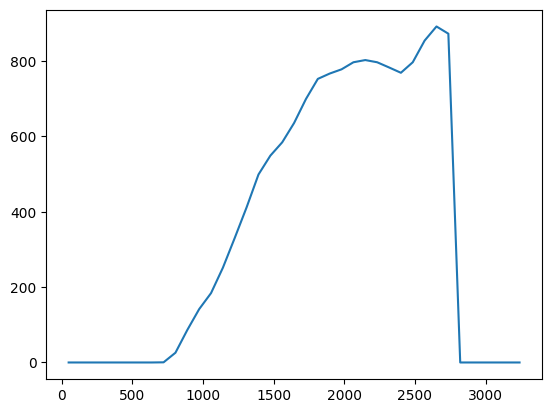

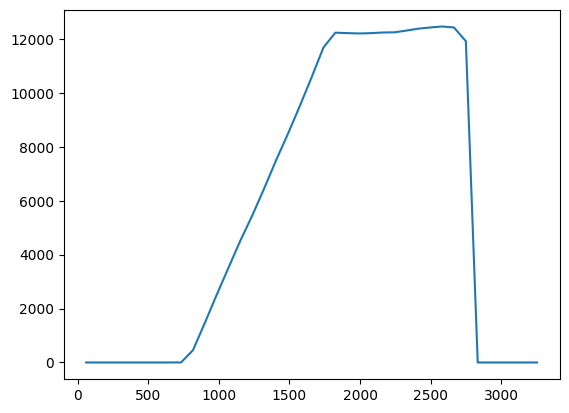

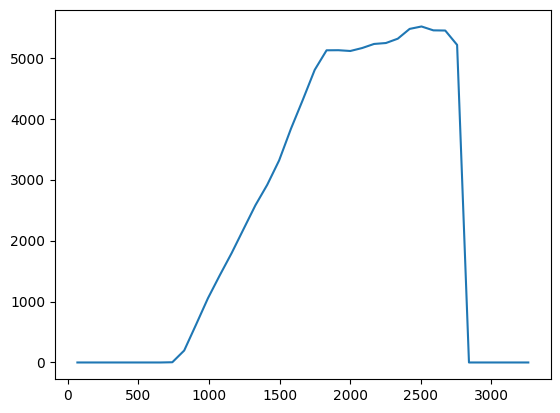

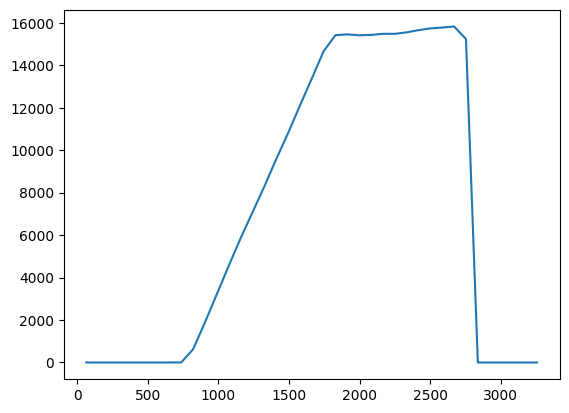

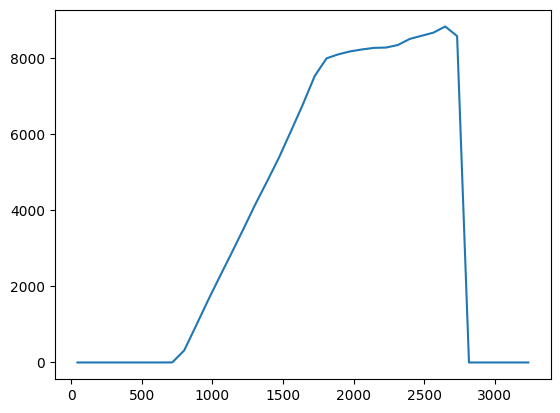

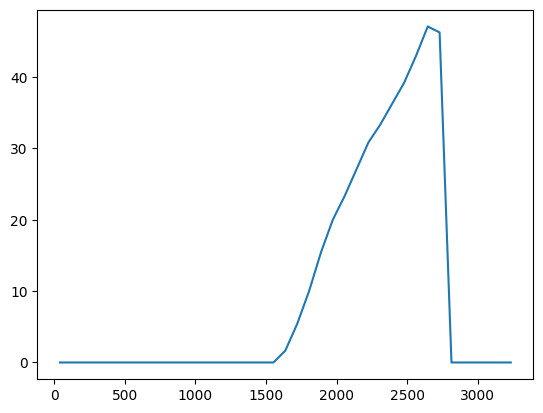

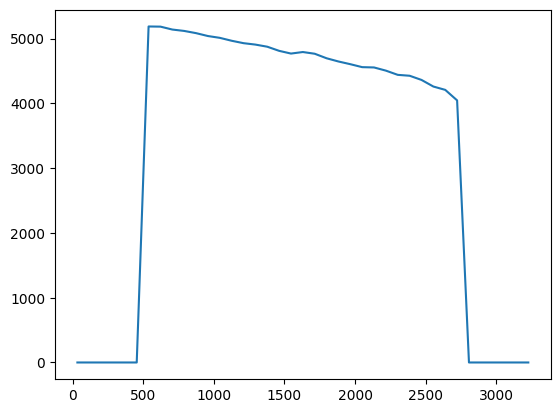

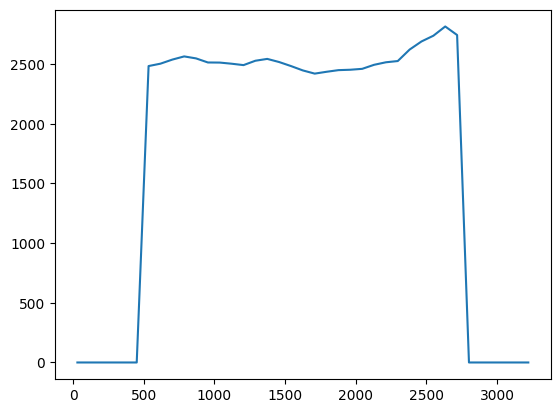

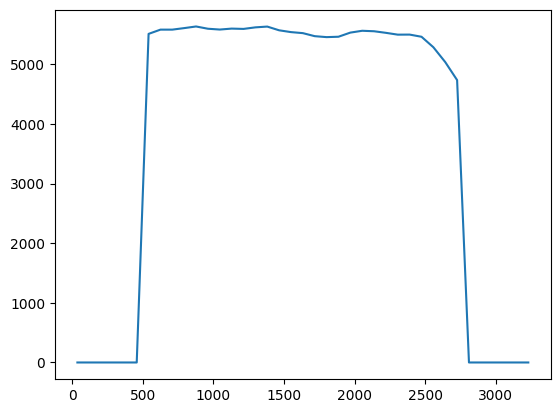

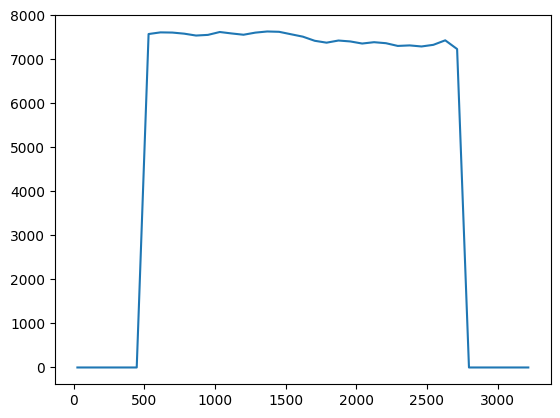

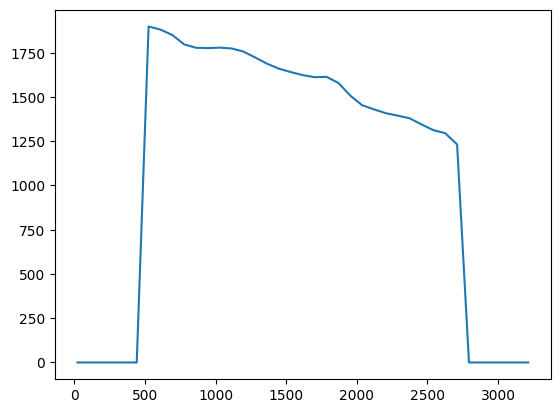

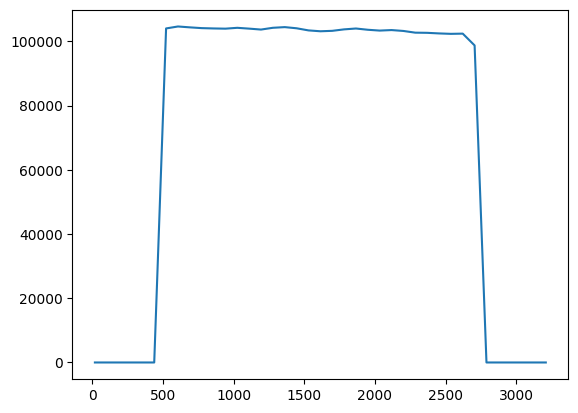

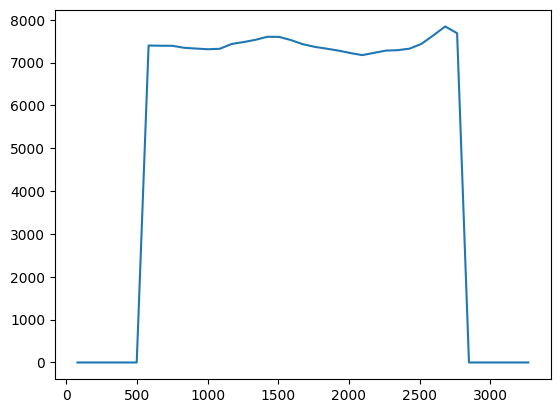

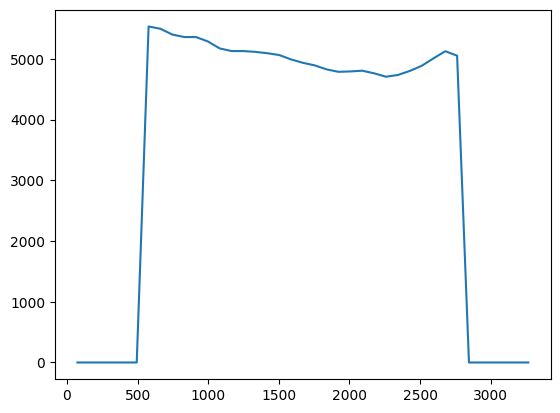

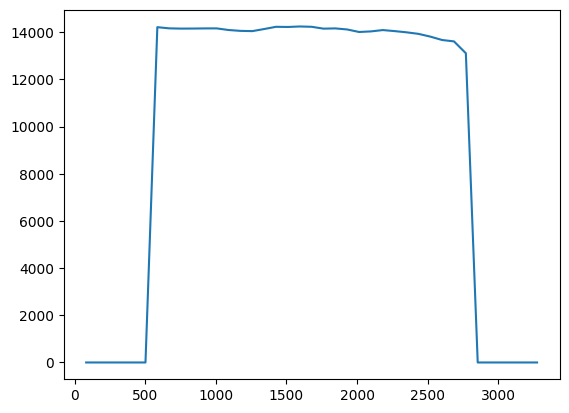

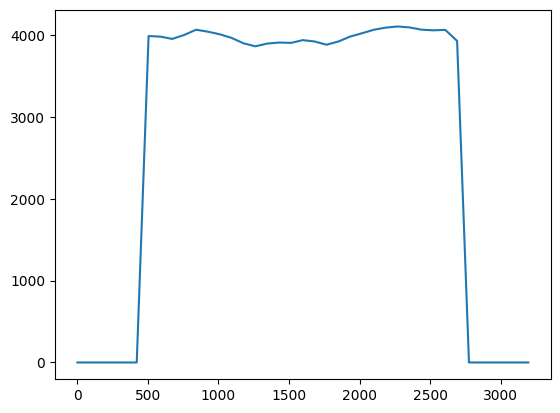

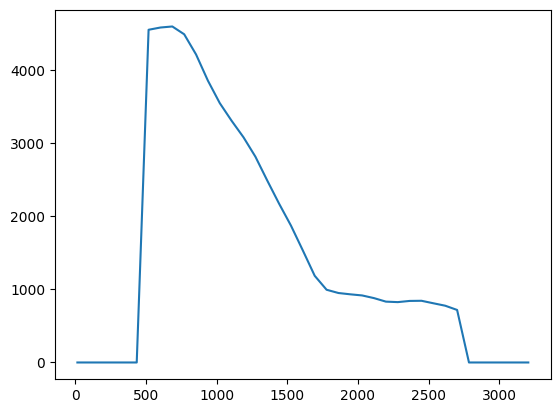

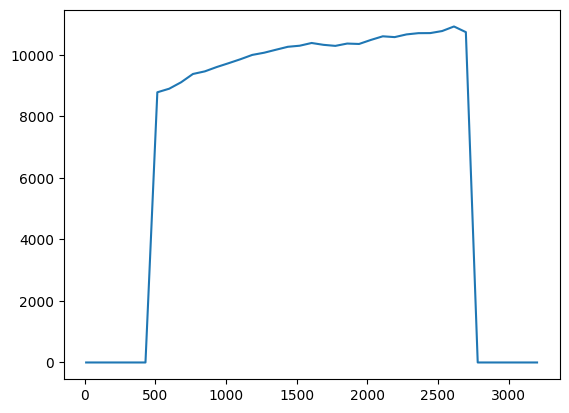

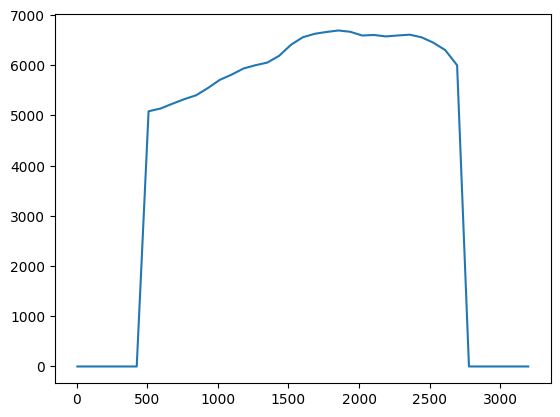

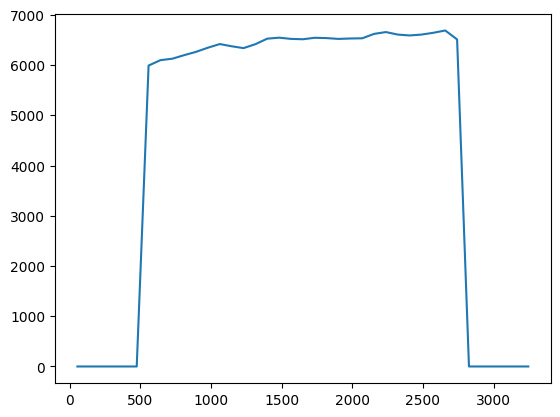

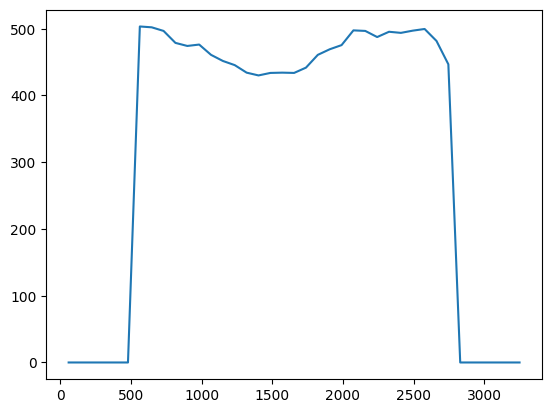

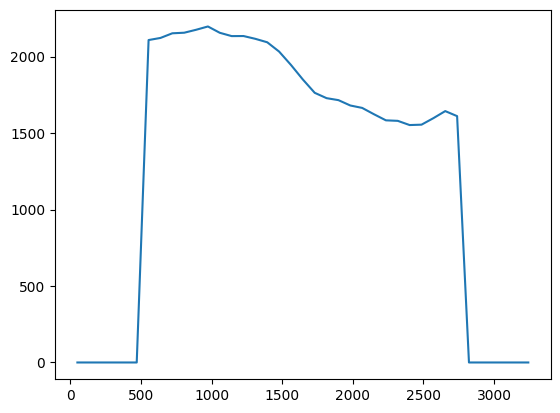

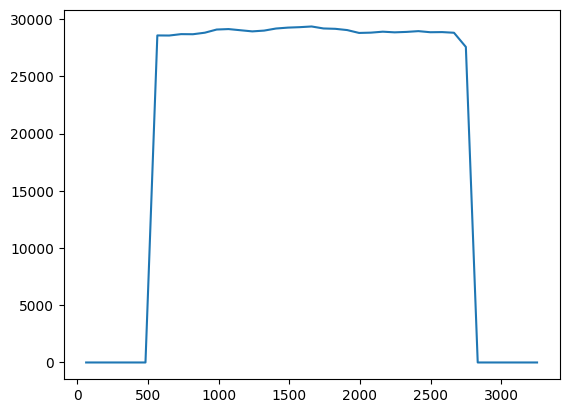

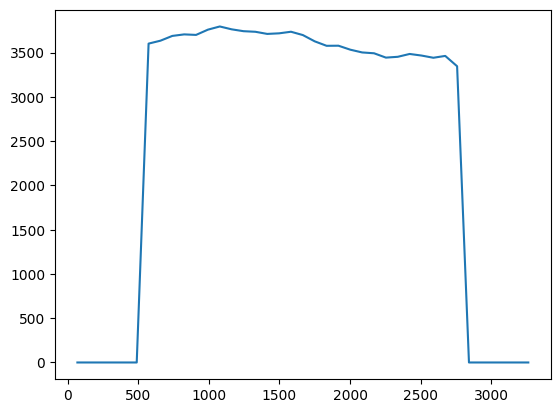

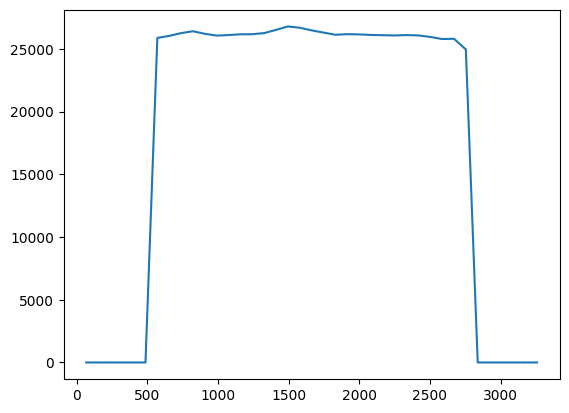

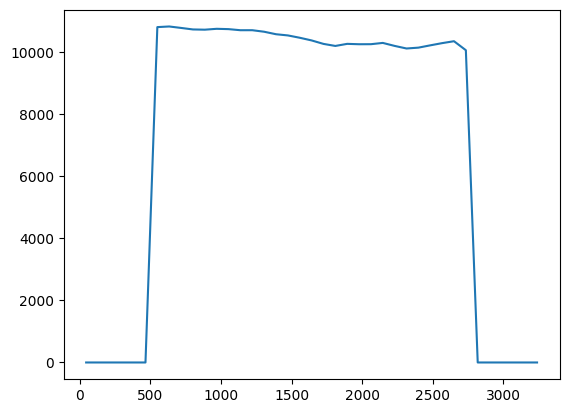

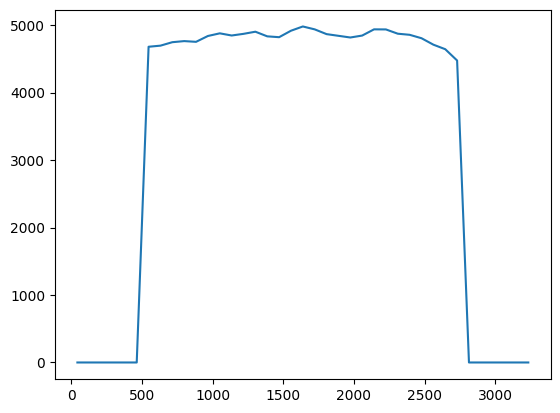

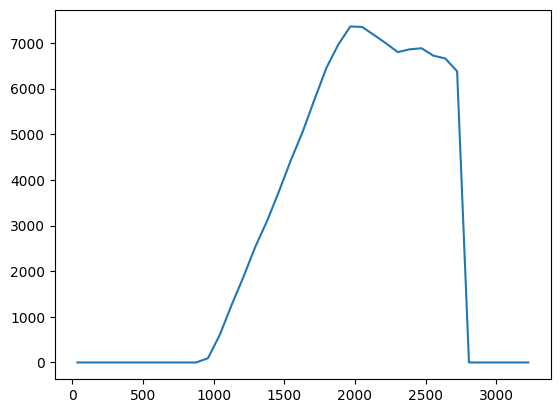

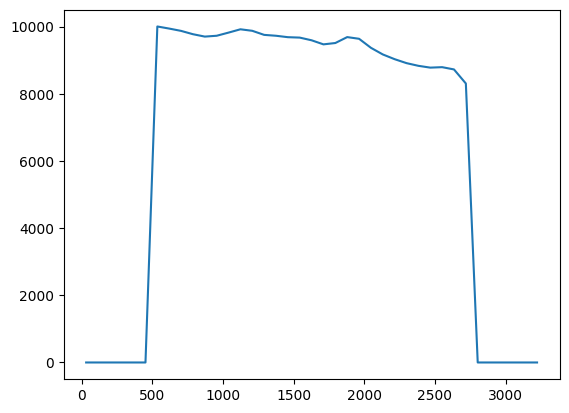

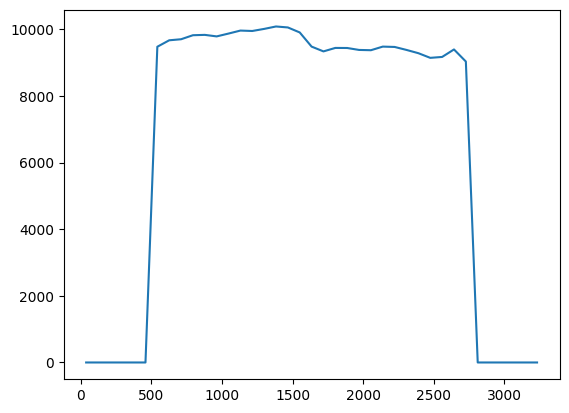

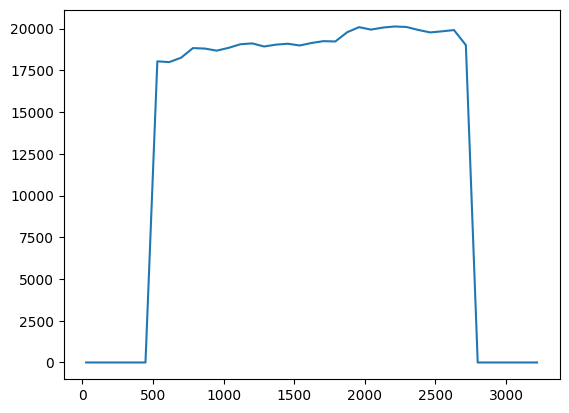

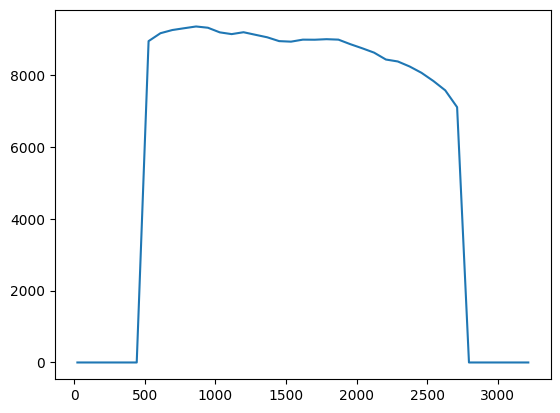

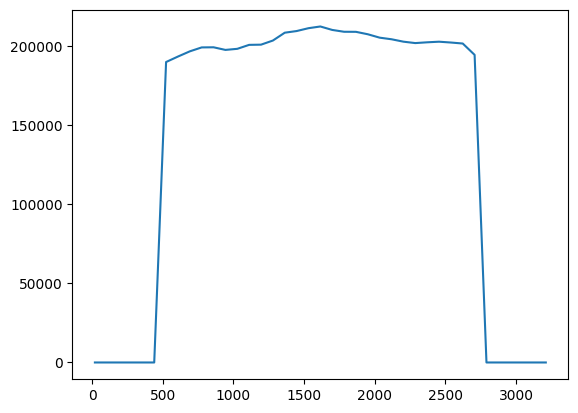

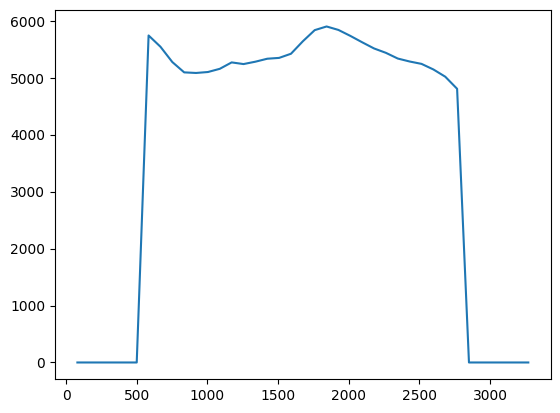

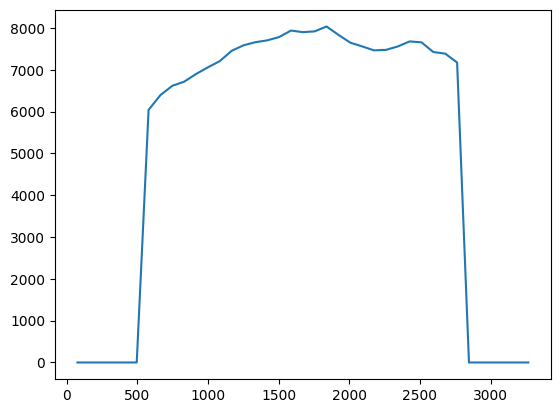

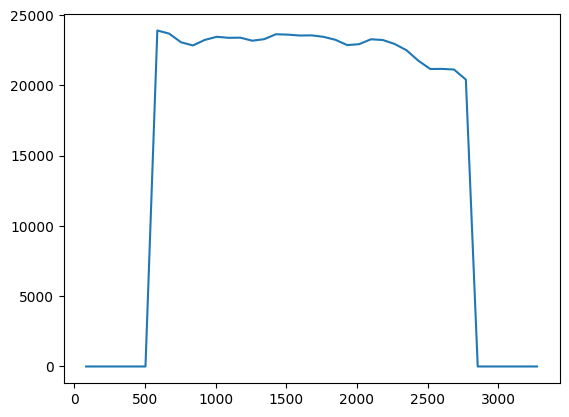

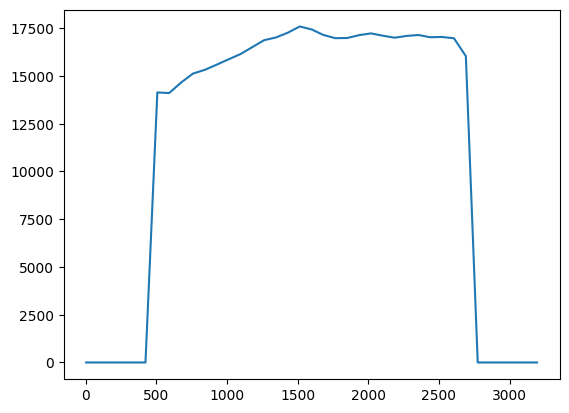

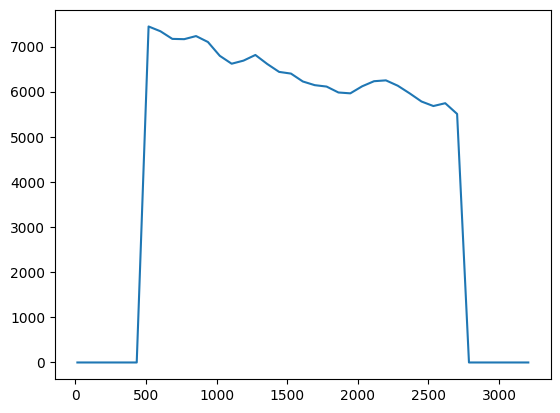

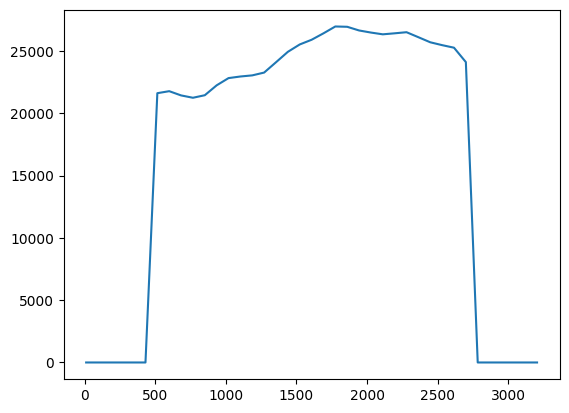

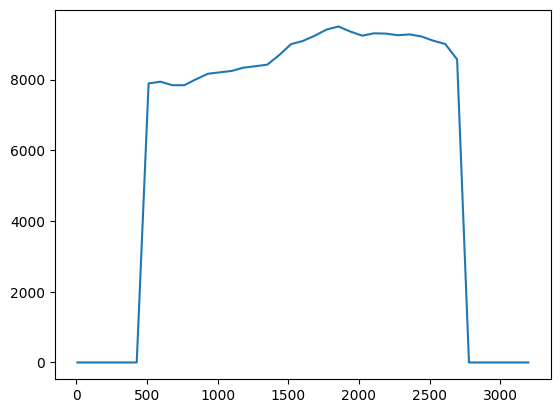

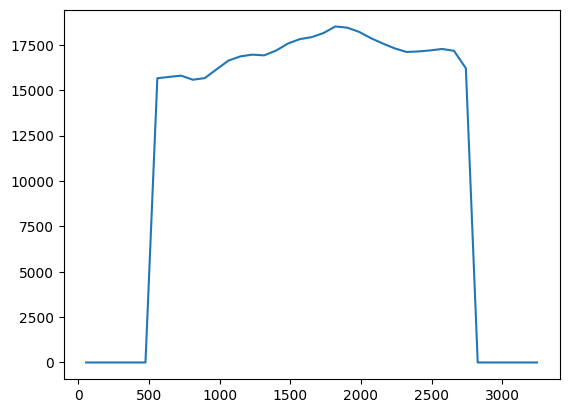

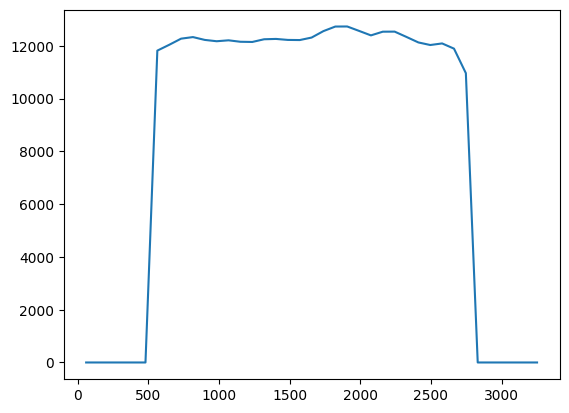

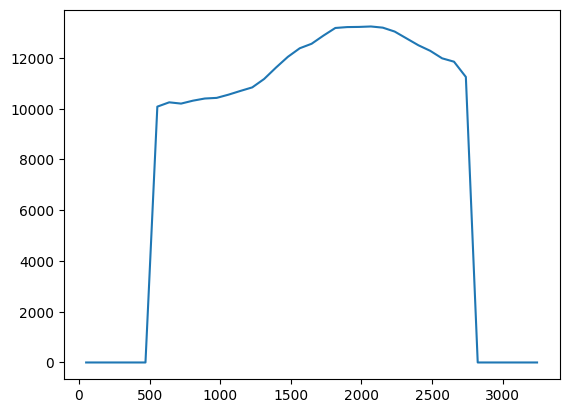

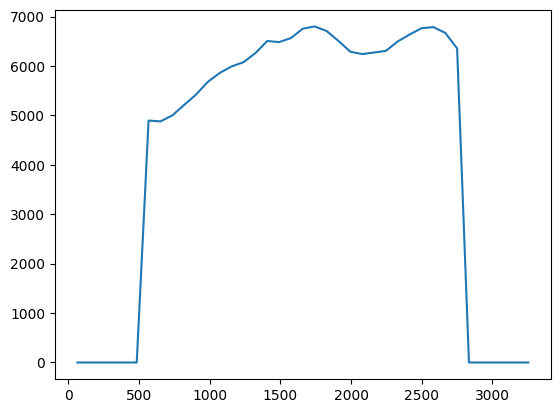

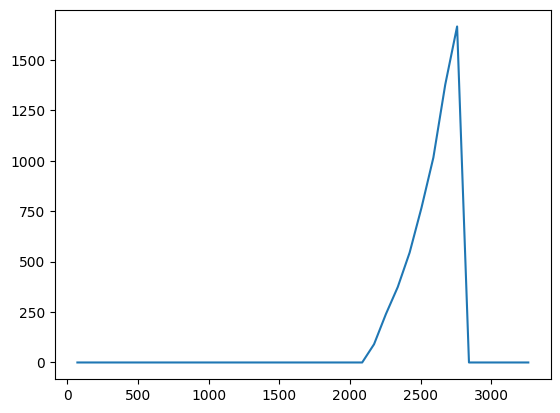

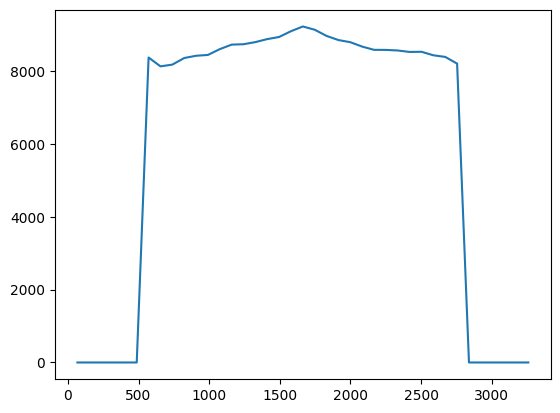

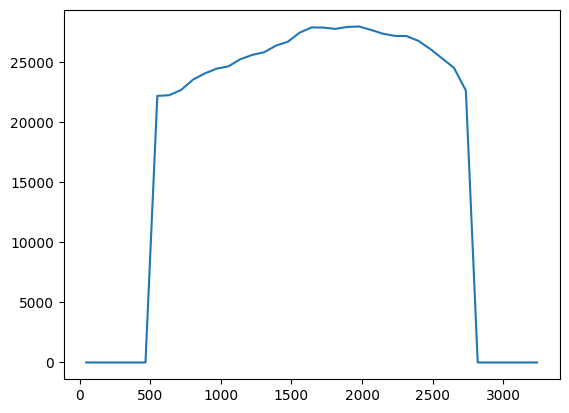

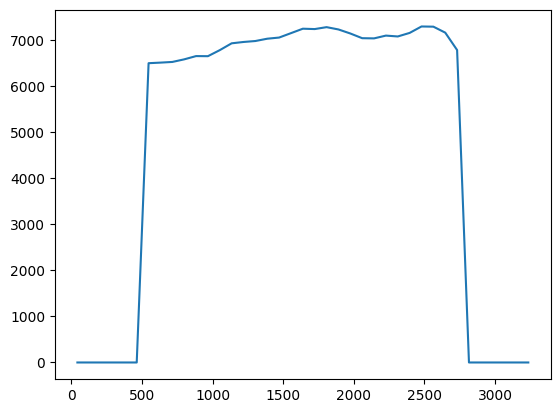

In [36]:
for hospital in df.ID_SITE_RATTACHE.unique():
  for medicine in medicines:
    df[(df["HOSPI_CODE_UCD"] == medicine) & (df["ID_SITE_RATTACHE"] == hospital)]["TREND"].plot()
    plt.show()
    print()